## 1 Getting set up

In [1]:
#importing the AWS folder
import sys
sys.path.append('/Users/tobywarner/Dropbox/textmining/workbooks/AWS/AfricanWritersSeries/')
import nltk
import lltk
# nltk.download('averaged_perceptron_tagger')
import warnings
warnings.filterwarnings('ignore')
import os
import json

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more det

In [2]:
#importing the aws corpus
from aws_novels import *

In [3]:
C = get_corpus()

In [4]:
# adding texts as strings to corpus
textastrings = []
for t in tqdm(C.texts()): textastrings.append(t.txt)

100%|██████████| 163/163 [00:00<00:00, 220.54it/s]


In [5]:
C.meta

,author,title,year,fn,old_fn,have,hitem_id,number,genre,anthology,...,nationality,origpubdate,note,lastname,shorttitle,path_freqs,path_txt,path_xml,_year_orig,corpus
id,,,,,,,,,,,,,,,,,,,,,
"Ngugi,The_River_Between,1965","Ngugi wa Thiong'o (as Ngugi, James)",The River Between,1965,"Ngugi,The_River_Between,1965.txt",,yes,,17.0,novel,no,...,Kenya,,,Ngugi,The_River_Between,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1965,AWS_Novels
"Ngugi,A_Grain_of_Wheat,1967","Ngugi wa Thiong'o (as Ngugi, James)",A Grain of Wheat.,1967,"Ngugi,A_Grain_of_Wheat,1967.txt",,yes,,36.0,novel,no,...,Kenya,,,Ngugi,A_Grain_of_Wheat,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1967,AWS_Novels
"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969","Armah, Ayi Kwei",The Beautyful Ones Are Not Yet Born. (Boston: ...,1969,"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969...",,yes,,43.0,novel,no,...,Ghana,1968.0,,Armah,The_Beautyful_Ones_Are_Not_Yet_Born,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1969,AWS_Novels
"Ousmane,God's_Bits_of_Wood,1970","Ousmane, Sembene",God's Bits of Wood.,1970,"Ousmane,God's_Bits_of_Wood,1970.txt",,yes,,63.0,novel,no,...,Senegal,,,Sembène,God's_Bits_of_Wood,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1970,AWS_Novels
"Soyinka,The_Interpreters,1970","Soyinka, Wole",The Interpreters.,1970,"Soyinka,The_Interpreters,1970.txt",,yes,,76.0,novel,no,...,Nigeria,1965.0,With introduction and notes by Eldred Jones. L...,Soyinka,The_Interpreters,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1970,AWS_Novels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tadjo,As_the_Crow_Flies,2001","Tadjo, Veronique",As the Crow Flies,2001,"Tadjo,As_the_Crow_Flies,2001.txt",,yes,,,novel,no,...,Côte d'Ivoire,,,Tadjo,As_the_Crow_Flies,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,2001,AWS_Novels
"Pepetela_,Return_of_the_Water_Spirit,2002",Pepetela,Return of the Water Spirit,2002,"Pepetela_,Return_of_the_Water_Spirit,2002.txt",,yes,,,novel,no,...,Angola,,,Pepetela_,Return_of_the_Water_Spirit,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,2002,AWS_Novels
"Tadjo,The_Shadow_of_Imana,2002","Tadjo, Veronique",The Shadow of Imana,2002,"Tadjo,The_Shadow_of_Imana,2002.txt",,yes,,,novel,no,...,Côte d'Ivoire,,,Tadjo,The_Shadow_of_Imana,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,2002,AWS_Novels


In [6]:
import pickle
with open('pickled_model_100521_45T2.pkl', 'rb') as of:
       package = pickle.load(of)

In [7]:
lda_model, corpus, dictionary, texts = package

# 2 Visualizing topics

In [8]:
# visualizing the TM
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False, start_index=0)
vis

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.050825  0.045396       0        1   0.000792
1      0.000155 -0.050358       1        1   0.591907
2      0.047302 -0.061836       2        1   0.477028
3     -0.049830  0.045374       3        1   0.000792
4      0.019460 -0.022325       4        1   1.540886
5     -0.137930  0.046816       5        1   5.808835
6      0.057946 -0.109322       6        1   0.904303
7     -0.014907  0.045148       7        1   1.665237
8     -0.054296 -0.030305       8        1   0.949706
9      0.025204  0.043102       9        1   2.840414
10     0.101452 -0.132427      10        1   0.390007
11     0.008705  0.006684      11        1   0.832026
12    -0.049901  0.045192      12        1   0.000792
13     0.121082  0.026254      13        1   2.418513
14     0.118171  0.108946      14        1   0.560563
15     0.131986 -0.059838      15        1   1.850871
16     0.008029  0.114807      16        1   2.106522
17     0.116924  0.130736      17        1   2.012384
18    -0.050568  0.044477      18        1   0.000792
19    -0.131584  0.022424      19        1   4.834149
20     0.110893  0.115141      20        1   6.191897
21     0.270889 -0.134769      21        1   0.611150
22    -0.050318  0.045018      22        1   0.000792
23    -0.054919 -0.033159      23        1   2.102112
24    -0.049654  0.046016      24        1   0.000792
25    -0.070310  0.004081      25        1   6.923399
26     0.174780  0.068936      26        1   0.780409
27    -0.053956 -0.087289      27        1   1.214535
28    -0.141595  0.033539      28        1   2.974025
29    -0.123139 -0.196559      29        1   0.912702
30    -0.049693  0.045504      30        1   0.000792
31    -0.050373  0.044906      31        1   0.000792
32    -0.048619  0.046333      32        1   0.000792
33    -0.071551 -0.037456      33        1   1.370386
34     0.107268 -0.075427      34        1   0.484584
35    -0.050030  0.045214      35        1   0.000792
36     0.109536  0.105070      36        1   3.313000
37     0.070721  0.047816      37        1   2.989761
38    -0.049039  0.042697      38        1   0.000792
39     0.050232 -0.105883      39        1   0.764331
40     0.019567  0.058354      40        1   1.579831
41     0.016657 -0.205916      41        1   1.062280
42    -0.090209  0.028512      42        1  12.357060
43    -0.081269 -0.007096      43        1   1.766433
44    -0.007654 -0.091106      44        1   1.463946
45     0.055684  0.030787      45        1   1.615823
46    -0.050924  0.045325      46        1   0.000792
47    -0.037935 -0.033564      47        1  16.208303
48    -0.110728 -0.130957      48        1   0.533343
49     0.039113  0.026987      49        1   2.987838, topic_info=            Term        Freq       Total Category  logprob  loglift
842         cell  578.000000  578.000000  Default  30.0000  30.0000
2497        baba  377.000000  377.000000  Default  29.0000  29.0000
4802   commander  440.000000  440.000000  Default  28.0000  28.0000
50         beans  355.000000  355.000000  Default  27.0000  27.0000
1745       widow  324.000000  324.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
281   headmaster   36.381993  288.159208  Topic49  -5.7735   1.4412
1525   shillings   44.027548  624.595698  Topic49  -5.5827   0.8583
1009   emergency   34.193566  229.532153  Topic49  -5.8355   1.6066
50         beans   35.709892  355.436732  Topic49  -5.7921   1.2127
35          aunt   35.980028  568.310588  Topic49  -5.7846   0.7509

[2909 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
3186      1  0.033671  -day
3186     10  0.033671  -day
3186     15  0.168356  -day
3186     17  0.033671  -day
3186     19  0.033671  -day
...     ...       ...   ...
3348     33  0.013412  zone
3348     36  0.013412  zone
3348     37  0.

# 3 Exploring topics

In [9]:
#function to show topic words
def show_topic_words(topicid):
    results = lda_model.get_topic_terms(topicid, topn = 100)
    for wordid, wordscore in results:
        word_string=dictionary[wordid]
        print(word_string, end=' ')

## politics and juridical

In [23]:
## union rural
show_topic_words(13)

canoe strike yam beach stall courtyard yams union kola lake hen shillings canoes chi aunt thieves firewood basin plantains gin cassava stalls calabash farms camp lantern womb festival slaves verandah kernel cowries ram twins traders director pepper railway tapper parlour fishing plantain fishermen pregnancy district veranda interpreter fisherman mourning herbs committee bicycle straw corn maid winds seller cabin cloths hens kerosene fruits trading tray goddess clothing watchman blouse potatoes workmen francs delegates cocoa apprentices column wares island everyone sandals plantation trader beggars silk management sacrifices farmers ships rats medicines drumming jar flood mortar crew jealousy bunch footpath profit astonishment pay 

In [34]:
## jail
show_topic_words(24)

prisoners sir soldier commander villagers cell lorry jail chiefs shillings yams plane tribe lawyer camp capital judge crops truck farmers guards calabash neighbourhood telephone minister maize priests natives troops yam district canoe headquarters verandah assembly lion spear beast cocoa rites masks north courtyard farmer feast prisoner scent mountains valley shrine farms sacrifices boat signal doorway kola whites chickens boss operation committee administration clerk steel inhabitants slaves election sergeant blankets thieves aunt banana airport president souls card beach bamboo tax platform pupils manager blanket clan refugees wire host sunlight team crowds strike pepper kraal paths crisis images colleagues missionaries officials congregation 

In [35]:
## slaves tenderness suicide mankind nightmare
show_topic_words(25)

slaves tenderness suicide mankind nightmare souls gestures goodness project phone universe rape neighbourhood personality seed minister jealousy destiny desert drama prostitutes truck culture relative stalls consciousness anguish prostitute images couch pattern whiteman coast civilization bells courtyard centuries vegetables politicians nurse beach traders torture farmer glory solitude womb concentration vegetable cruelty trench crisis identity patterns governor rules bishop ecstasy depths perfume appeal compassion penis charms midday instant sunset curfew tragedy values millet butcher screams deaths studies boat conference century torment creatures intensity communication greed boats experiences banana villagers filth trust roses humanity societies liberation symbol silk poetry winds bastard shore pathway 

In [38]:
## sergeant insides captain tape whiteman teaching identity
show_topic_words(27)

sergeant insides captain kraal tape whiteman canoe verandah phone bloke teaching identity madam sofa shit cook camera sweetness rumours telephone pages eating cameras desert butterfly root research cripple commission aunt landlord asylum culture sunlight cousins ants blanket gas blouse oppression comrades presentation messengers shoe fly caf dam chains rape listener concrete weapons intelligence typewriter relationships questioning creation poetry college factory embers edges experiment instant stinking mountains yam countries reconciliation brandy ice bullets cracks aggression egg emotions cage paint novel ward slope difficulties void team anguish boarding solidarity articles moods constable bucket illusion raincoat march agency whisky caves veil rim pepper 

## Events

In [39]:
## poetry and soccer
show_topic_words(28)

poetry ambassador stadium conference counsel press throne democracy ministers countries debate journalist century journalists team football continent coup witnesses troops television excellency culture herb novel poet impact personality topic soldier soccer military anguish constitution article resignation centuries goal judgement palace spectacles committee proceedings literature testimony curse consciousness artist wing citizens motion ruling principle majesty opposition tragedy president sergeant adviser operation plane cigar civilization gates crisis elements decades leaflets initiation states minister concept watchman pavement deputy interests nakedness reader implications millions programme talks commitment teams bitch multitude photograph anarchy access model concentration crowds aunt a- region opinions strategy petrol solution test 

In [82]:
## wrestling matches
show_topic_words(26)

camp wrestling arena shrine yams wrestler lion outing dove scrub baba wrestlers tax festival wrappers wrapper sickness champion markets opponent masks veld whip villagers throw chalk thieves maiden blacksmith fly herd settlement border disgrace banks thorn snuff negotiations donkey official herbs traps drummers wandering beast charms leopard hunter trail farming bamboo gin wishes cola fronds tapping mask maidens calabashes opponents horses horns matches arrows dusk flour hip host masquerade flames sacrifices eagle combat misfortunes decorations suitors dancers hunters bow prince designs barber charcoal rocks rats ashes quest pregnancy clan shapes butter crocodile cows races clearing arrow antelope bees cocoyam devotion 

In [45]:
# funerals
show_topic_words(39)

homestead widow mourners relative coffin clan forgiveness alcohol nurse rubbish seller mourning pastor aunt stall pregnancy maid kids madam whore colleagues calabash altar bucket womb weekend villagers cash uncles cow truck dump vendors grandchildren pants scar bathroom bull witches clinic festival maids dishes libation nephews rumours cousins passenger programme girlfriend thicket headman owners penis cemetery carpet emotions blouse grandchild yam witchcraft lift partner guy widows plastic armchair kilometres stew rituals insults speakers rumour nurses stalls soap headache photograph -law granddaughter sip loyalty jeans midday midwife shoe guts tomato colleague marriages frown pit confrontation phase instincts nuts pillar buttocks jewellery trips 

## Micro genres

In [81]:
## campus, studying abroad, prodigal returns
show_topic_words(29)

aunt telephone stairs snow lagoon rubble ice video airport fridge university television department tv bathroom phone porch film screen salary cement classes plane curtains career perfume winter construction landing tiles electricity balcony boss flat bicycle sunset films tenants dollars pavement journalists ward soap tent photographs cuts journalist library restaurant tray fan exams prices holidays rules lecture cards wool rubbish cities cook secretaries van everyone culture luxury buttons cream maid scandal plants sink link cats dates contacts cheese thesis partner lessons dishes tents interviews phenomenon handbag nurse twins tourists gloves card arguments continent navy bricks programme cousins tap champagne foreigner awareness 

## Precolonial(?) imaginaries

In [46]:
# lineage missionaries
show_topic_words(40)

lineage missionaries missionary principal priests college priesthood classes examination team football location spectators choir p.m. twins attendant goal witches masquerade aunt bishop pupils rings shillings headmaster mistress attendance parish baptism oranges applause attendants practices luggage admission railway shrine coach salary nurses interpreter certificate concert dining nut converts witchcraft congregation presents jail cousins native pound holidays orange culture residence companions charms bee wagon district rumours teaching gentleman standards mile lorry aunts pass sports whistle orchestra methods childbirth altar sacrifices scholars traditions sins narrative tribe lecturer marriages paths teams guardians relation herbalist leave stay token spread bridegroom commandment prestige liquor bicycle sewing 

In [27]:
## village ritual
show_topic_words(17)

reception villagers yams divination kola warriors pond traps wrapper sacrifices arena leopard matchet clan arrows pepper rites boat wrestling negotiations cowries assembly prisoners charms cough killer consciousness shrine oath warrior compounds debate talks headache plantain bamboo boundary yam opponent seer dispute warrant nut midday application opponents arrow horn wrestler vegetables track prisoner wrappers pathway potion haste herbs forests farms nuts items tortoise fishing skies instant mates shrines charm invaders priests medicines bows companions volunteers engagement claim hen moonlight bow proverb speaker mound quarrels fellows bid doorway fighter drug crying district dish struggles peers item hunter rules tones generations drummer reincarnation 

In [53]:
# warriors 
show_topic_words(45)

lion lions tribe chiefs lawyer warriors townships star queen camp woods beast armies van slaves witches spears beasts warrior sunset kingdom spies overcoat spear skies wilderness enclosure herd oxen cows disappearance principal skins north tribes desert plains allies summer speaker corn banks tiger headman views devils invaders capital hunters forests harem feast beef massacre valley mistress thirst personality shield outskirts travellers execution companions kings truck horses wizard ox march herds glory buck maid fires footpath battlefield west ruler foe library rifle slope ravine speakers stay goodness experiences flow prejudice ridge buzz hunting praises charm pills clan magician judgment expedition depth 

In [44]:
# spears
show_topic_words(37)

spear natives warriors native armies lion spears crops medicines regiment nations hyena kraal caves concession mountains tribe chickens rivers kings district messengers warrior north wars ruler translation troops whites farmers veld heir jungle verandah tribes beast whiteman guards shield maize rifles brick moons nigger grain praises forests fame territory kingdom east creatures deeds ox plains wishes chiefs blankets south reader bees slaves cave doorway killing farming sacks witchcraft sofa herds commander camp madman deed murderer feast west horses expedition fruits blessings stake seasons beasts festivities manuscript glory hate bonds skins council hunting rebels phrase occupation column range councillors elephant abundance 

In [31]:
## catechist yams 
show_topic_words(20)

catechist yams clan yam feast calabash palace cassava tour sacrifices priests matchet python veranda tribe buttocks palaver baptism courtyard lorry shrine bamboo farms villagers banana hunter misfortune goatskin dancers cook interpreter flute leaf festival juju missionaries chapel mourning baskets beast bells snuff chickens bicycle machete altar calabashes presents cemetery mask kinsmen cow deity nuts fetish horn confession kola chi rites ceremonies hen messengers barn congregation slaves president drummers herbs abomination curse cloths converts compounds boat crops salvation crow offence suns seed catechism spell worship stools pepper sermon horns wrestling drumming beasts vultures administration moons forests doctrine assembly singer cowries flock 

In [21]:
### cattle complex
show_topic_words(10)

widow cows cow robe beasts camel dwelling calf photo porridge beast kid caravan calves aunt doorway shillings ribs coal nephew fee bastard packet virgin meantime tribe shoe herds slate rosary crate vessel monkey mosque cord harlot somebody mattress veil witnesses insect engagement toilet dowry dwellings loan straw divorce bye boxes pregnancy suggestions colleague womb torture cot maid shopkeeper operation travellers novel seasons ink agent groaning instances drawings fro leaf dots peasants urine handful males prestige blade everybody partner prostitution thorn fights ignorance inches prostitute opinions blessings tenants prophets buttocks talking heaps desires no. intentions daytime elbows opposite nape poles prophet 

In [32]:
## more cattle complex
show_topic_words(21)

kraal cows cow bull butter gourd calves bulls council lion calf pastures calico hearth dung herbs owners banana masters blankets urine beasts medicines employers herd twins skins calabash enclosure ashes bellies container hunters rivers potatoes spear grains beast companions womb farmer winds host fireplace crops lice mountains stomachs savages lions gourds spittle homestead employer dances adults sunset insults households penis ridge chickens spears lump patches bowels gulp saliva thirst kinsmen blanket manners loin arena villagers colleagues rituals plantation monster python inch lungs savage yawn employment everybody owls shit herds wishes meantime containers near settlement expert bananas charms prey rid jungle 

## imaginaries of political economy 

### rural

In [41]:
## colonialism and agriculture
show_topic_words(32)

beans villagers strike lorry shillings priests bicycle yams whiteman camp tribe lawyer sir maize soldier whites veranda kola judge lineage baba cassava headmaster crops principal altar minister courtyard lion detention ridges salvation spear coffin sacrifices truck blanket feast congregation plane platform fees prisoners slaves college yam tins reception district oath missionaries blacks aunt shrine companions committee cell classes officials chickens university kraal administration ages guards catechist thieves wrapper warriors telephone clerk chiefs beach sergeant council pay mistress curse cook arrangements ridge capital whisky boat examination priesthood doorway catechism concrete pepper midday parish chapel banana manager seed sunset corridor warrior boss 

In [86]:
### colonial pastoral
show_topic_words(9)

whites kola veranda medal constable cook dowry coffin engineer nut yams boat clerk jacket courtyard gin lad interpreter schnapps buttocks libation nuts nurse location banana sentry bye latrine tailor pepper curse conductor bamboo headmaster pastor coins cloths truck shillings guide thieves operation approval township cassava lagoon leave sergeant cement gleam sixpence cemetery houseboy messengers beach catechist maid shilling maize yam proverb prisoner jail brass natives towel boats moonlight fan murmur lorry debt constables pan raffia mats whisky fishing sponge kerosene riches smallpox lavatory bathroom elephant parcel timber attendant soap tortoise leaf dancers mistress penny cocoa astonishment steward lamps discussions shore 

In [25]:
## rape crops villagers
show_topic_words(15)

rape crops villagers novel brush dew porridge oxen maize sunset chickens graves reader cow vultures witchcraft homestead headman millet doorway necklace grain axe duel pump blankets acres witches commandant crop wire groundnuts rocks frogs border grazing ghosts nuts kraal granite drought poles hunting brick organization moonlight herbs bucket worms refugee plot firewood whip clearing slope fires south knives newcomers agriculture vegetables flames fireflies rivers pitch leaf strike winter log cows forests herd dusk beasts zinc horns grasses buck maker chiefs mango blanket beast production plants demonstration dishes weeds elephant thorn corn kids text midday potatoes ox farming sweets logs buckets 

In [26]:
## taxation / colonial administration
show_topic_words(16)

chiefs administration shillings tax cocoa council congregation lawyer clerk sir chieftaincy district taxes lorry juju palace tour worship appointment salary payment farmers counsel kinsman expenses envelope riots cement salaries hymn magistrate villagers construction officials contractor subjects commission inquiry assessment lawyers stores courts collection mama veranda parlour chairman motion approval territory fund assault proceedings kola crown farmer platform farms royalty writer dais benches concrete arrangements assembly fees lovers constables headquarters preacher lantern youths comrades judgement smallpox appeal horn motor fights guidance pound allowances engineer traitor sermon sixpence operation whistle rites cutting mighty funds instruction judges cycle witchcraft throne allowance consequences bastard 

In [24]:
## rubber plantation
show_topic_words(14)

kinsmen plantation rubber lorry headmaster bicycle site workshop officials tax timber committee catechist churches gin guards builders hearing yams needle charms sewing convent jar kola idol shed chairman apprentices matchet sacrifices interval jars shillings shrubs liberation cassava countenance fruits persons speaker wrapper rebuke offence saying tablets proverb hen oracle chi palm-oil portion pedal yam cousins inches fowl fuel patients masquerades gong parish packet plants pepper charm wrist pence objection wheel rumour masquerade scraps sergeant gramophone snuff converts dresses angle messengers demand lad ashes lunatic male containers basin raid depth homestead followers trace reception villain no. accord idols winding robes universe 

In [33]:
## rubber plantation racialized
show_topic_words(23)

whites blacks rubber guardian captain traders statue angel estate barber settlers lieutenant rebellion boss dining slaves aunt rent beach neighbourhood football north interior troops caravan nephew principal shit population barracks territory black soldier white capital trader bitch shooting rocks bishop terrorists grandson pick catechist jeep plane leopard angels boat south kilometres porch railway corn whisky profits stall trucks commander prices slavery ships sergeant forms creation boarding drumming poem ship hunting bullets witchcraft region poet colonialism crisis column maize metres mosquitoes bastard oxen wagon port anguish council desert gentlemen empire sword phone shot fellows poems wages officials stove bastards whip camp 

In [43]:
## colonial agriculture
show_topic_words(34)

beans inspector schooling cassava truck conductor blanket maize boss mattress hearth grain ticket sandals mortar travelling north chameleon luggage seed agent tins east west concrete groundnuts thirst streams villager vehicle vehicles reed stillness commotion crop pupils disbelief mama buses destination transport stalls steel salvation twilight south plight pestle thread sunrise fatigue tiredness boot coin tribe knot bulk travel rag exclamation powder emotions fireplace dish barn twig portion flicker gourd lion elephant desperation whirlwind crops defeat jacket dusk bunch relative monster fare jeans corridor capital stairs produce vegetables cough adult grade humanity shanty enquiries gallon firewood possessions stools thieves sacks chickens 

### urban

In [42]:
## leisure
show_topic_words(33)

mistress frog whisky beggar villa francs cinema fountain tenderness aunt whites chauffeur fishing editor caf jacket hotel maid telephone coast appointment polygamy article scandal pavement sir cheque district businessmen hunters customer tomb deputy shyness boss dresses presents shower colleagues monkeys phone contrary pension virgin thread goodness tones cowries innocence journalist employer pregnancy writer tailor film lane plane engagement kiss receiver fiance minister stairs star fraud sofa divorce calabash inhabitants basement wishes artist articles licence arguments carpenter ladies bathroom intentions liquid leper bye cigar astonishment adventure promotion coward expense contract jealousy silk disgrace pyjamas explanations precautions peasant darling island ambition chap 

In [49]:
#white collar
show_topic_words(42)

lawyer judge lorry clerk sir counsel manager kids mum university college prosecution telephone corridor axe dad persons custody examination lawyers colleagues whisky fees vehicle envelope rent leave veranda salary council boss pay bathroom landlord cash van handle classroom keys stew certificate studies profession career magistrate holidays pound penny bungalow truck apartment photograph host offence hotel drivers dock grin plane passport shopping concrete mango labourers witnesses scarf congregation scholarship citizens motor editor culture department flats district contrast income ship prospect cousins conference press p.m. stay interests mistress airport railway gin ladies television agent fare method gown announcement junior lessons folk appointment 

In [47]:
# paying the bills
show_topic_words(41)

kids nurse landlord rent library stairs nursery mines snow jail tenants manager ward television winter shack nurses truck column toilet cage blankets blacks boss pass farms whites ambulance backyard summer surgeon ribs chips cot gas pay gates dresses flat north softness factory tube paraffin writer verandah tummy shawl pants wash rubbish angels examination cards horrors bleeding worker tap toy shift candle ladies shirts hum midwife lump piles mornings temperature sermon tunnel working patients studies pills shillings hollow woollen bend gentleman pavement sickness listeners dump packet likes headmaster emptiness din tins pound baths cough mug washing settee everybody black surgery stay 

### clan camp colony

In [16]:
### clan camp colony
show_topic_words(7)

clan colony camp francs cocoa chap peasants lorry whites governor blacks lad officials inhabitants official soldier administration kilometres missionary boss clans troops jungle licence companions peasant zeal port pidgin courtyard district test magician metres host ranks sacks prisoner tasks capital scales traveller suburbs astonishment platform arrivals gestures avenue generosity rank spectacle champion sack nightfall employees apprentice feast indignation union hesitation beast employer elections contrary route population destiny cell interior tumult hero bucket skill eve posts indifference resentment prisoners monster uproar maize newcomers driving fellows merchants midday masters illusion director capture camps wandering traditions disappearance council palace porters necessity sobs defeat 

### thievery

In [13]:
show_topic_words(4)

theft thieves cave robbery robbers foreigners shillings feast peasants competition card ceremonies masses university platform profit clan handbag companies talents worker vehicle fruits petrol instruments hotel countries banks bellies unity doubts organization culture hotels judge crown overalls testimony experts thirst cards disciples peasant perfume deeds cents aunt clubs famine chains imperialism horns paths council slavery salary skills imperialists saying homestead praises robes fare worlds suits knot motor capital stores humanity types products degrees suitcase whites delegation souls rags factory flower cent slaves learning carpet pearls thugs site tins director skins pistol fees organ composition hero farms roadside vegetables talent ambition 

## Armed conflict

In [50]:
show_topic_words(43)

troops sir commander artillery aircraft division rifle guards trenches signal assault ammunition junction raid operation cabin unit comrades headquarters pistol bombs soldier signals route trench capital rifles prisoners tarmac roundabout caravan flank convoy captain reports fronts mile cannon camp locations reinforcements units steel battalion positions sah team wheel pilot stretch rebels salute barrel rank burst retreat flanks telephone hero firing morale column whisky camouflage wrist operations weapons map fronds access vehicle truck arc concrete supplies intelligence rounds ambush check shells trucks phase combat emergency personnel objective bastards pencil supply tower platoon assignment career offensive jungle steering crew bungalow pursuit battery 

In [12]:
show_topic_words(2)

commander border camp mountains villagers cave detachment comrades rifle guerrilla assembly east ghosts lion valley hoe crying township baobab soldier manager headman prisoners camps trail medium nightmare player lions handle dying drummer finance gunpowder comrade baboon wilderness instruction positions range sunset veld heroes supplies kilometres nightmares villager confession pandemonium gunfire keys burst ammunition spear everyone vehicles foul celebration edges farming shack commando futility killings massacre rally liberation truck instrument tragedy revolt battles killing wire thirst blanket anguish farms circles piercing desperation blade trace ranks platform mist forests lounge assault discovery hip ox artillery rifles exhaustion butt magazine pens numbness decade 

In [30]:
show_topic_words(19)

plane soldier airport commander refugees squad troops sir headquarters planes civilians bombs battalion ammunition shells rebels rifle colonel sergeant boss corporal currency telephone hotel luggage contract camp coup platoon operation guards petrol equipment rebel politicians bullets lorry lieutenant check survival rifles officials territory cheque dollars weapons detention barracks trench division uniforms positions tribes rank unit explosion reports governor capital lorries tribe aircraft minority belongings companies shooting mile captain shell cell regime raid hostess operations lounge signal garri villagers pilot arrangements suicide bomb population artillery supplies route prisoners shots creation vehicles journalist phone negotiations vehicle bullet shot trucks farms suitcases pistol 

### Politics

In [14]:
show_topic_words(5)

minister sir election university telephone colleagues demonstration gentlemen appointment strike policy lorry chairman opposition constituency campaign phone politician politicians capital ministers elections vote customer whisky steward article gentleman contract colleague gin study ladies director drive cabinet construction officials bicycle countries funds candidate scholarship receiver contractor headquarters salary cent guards contractors supporters press applause aunt headmaster boss ministry host copy finance card democracy companies cash petition project thugs suits votes drivers administration carpet career solution citizen countrymen stall resignation conference park editor lounge comb loyalty dais gang delegation ivory microphone emergency citizens fellows economy union files expense accounts intelligence crisis excellency 

### Pests

In [15]:
show_topic_words(6)

cockroach camel rats snakes strategy parrot crow rat rabbits owl mosquito bosses deputy emblem crows wars ship minister horses commander battlefield honey goal beef duel flag bananas bullets humanity missiles cities gentleness zone universe robes armies referee dung bombs beards bamboo beak scorn weapons machines banana ambition science silver shapes bodyguard toilet masters beans hero trains skies rabbit opposite glory general defeat consternation intelligence cabinet brains moustache invention pig hug chairman coffin salute aeroplanes cockroaches sergeant whistle shot brass embrace corn egg trumpet boss lizard fat bite survival frown groundnuts telephone photo tear horn humility insect calabash angle bomb promotion 

In [51]:
# prison
show_topic_words(44)

cell prisoners warder guards cells warders jail blankets prisoner quarry colonel span blanket bars dish mouse location dishes baskets bucket wire criminals strike mats concrete confinement rat screen whites buckets card torture inspector column mug cards jacket arrest kaffir giant buttocks gallery damn jackets hyena doves thud queue heap keys newcomers porridge release blocks pigs toilet monster pigeons regulations boss offence stadium cancer mist squad showers complaints steel grin ribs comb mate blades diet superintendent tragedy pig latrine fairy jaws trail pack stomachs growl ticket defiance spread wrist arrests dung wolves frustration anus island dove paw convictions crack photo claws 

### difficult to categorize but still interesting

In [84]:
# achebe's iron horse
show_topic_words(36)

bicycle shillings dancer maize tins headmaster yam shed kingdom fees medicines masquerade snuff witchcraft vehicle kernels nephew kola yams valley rose dancers axe lion interval cassava diseases witches chickens proprietor examination jaws leper handle creatures palm-oil twins plants heap fruits missionary natives leaf villain drugs packet hero jar fibre employer owl floods masquerades pupils candle nuts bicycles fee countenance scores lepers profit shell diviner locusts shells insects coconut tablets ants shilling crop calabash beach saddle eyelids backyard salesman womb remains speaker raffia meantime kernel widow headman charm stores fowls grade customer lorry pence cards pennies wink hyena mound rays dresses 

In [85]:
# alley barber cloak 
show_topic_words(8)

alley barber cloak astonishment carriage darling widow forgiveness candidate eyebrows beggar scandal mosque trace indifference merchant stairs shroud waiter farewell lad sofa goodness wheat amazement blessing filth employees shutters poet annoyance emotions beggars goodbye apprehension rent sweets factory threshold hostility courtyard scorn slippers trust engagement dish gown electricity generosity armchair indecision tomb bronze vitality contentment desires shelf inhabitants pilgrimage robe profession consequences hesitation adventure penny quarrels sir perfume mock cure conduct gossips conceit everyone veil premises envy indignation worries instinct vanity regret department clothing blessings profits bewilderment manager partner test instincts disgrace doubts distress apartment spectacles garbage oven customer defeat 

In [22]:
### S Africa 
show_topic_words(11)

natives kraal rebellion cave chiefs priests rebels caves whites disciples district camp medium tax dwelling hearth pastor intelligence surrender valley horses supplies troops countenance settlers objects east contrary instant substance countryside grain flag bullets patrol granite exile obstacle drought princess rifles rifle districts necessity west liberty rising twilight studies flower cannon rocks revolt supplication universe wagon capture combat caf nothingness depths foe verse measure serenity rug escort bullet echo nobility cabin followers quest joints reports target murmur masters limit muttering prisoners meditation mosque science foreigners stature murders fellows patrols prince mines asphalt reflections defeat clarity captain shrine campaign spies fires 

In [28]:
## plane cell 
show_topic_words(18)

plane cell prisoners sir lawyer guards whisky vehicle sunlight whites aunt telephone lorry shit boss troops desert camp soldier villagers lieutenant blacks dancer cockroach minister blankets hotel camera airport snakes shillings judge university bicycle warder banana clan maize rats wheel corridor beach canoe cameras baba doorway beans kola truck strike chiefs coffin headmaster steel operation committee jail curtains lift nightmare rifle colleagues platform slaves journalist thieves card clerk flames yams verandah intelligence capital jacket womb commander film phone blanket concrete mistress shell chickens cities buttocks camel bullets valley destiny officials universe courtyard boat stairs rat rent bars keys chairman humanity 

# 4 Merging dataframes

In [54]:
ld = []

for corpus_doc,corpus_id in tqdm(zip(corpus, C.meta.index)):
#     print(corpus_doc)
    result_tuples = lda_model.get_document_topics(corpus_doc)
    result_d = dict(result_tuples)
    result_d['id']=corpus_id
    
    ld.append(result_d)

df = pd.DataFrame(ld)
df

163it [00:00, 287.55it/s]


,49,id,25,44,47,9,42,7,11,13,...,36,37,38,39,40,41,43,45,46,48
0,0.999399,"Ngugi,The_River_Between,1965",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.569244,"Ngugi,A_Grain_of_Wheat,1967",0.253048,0.013053,0.161704,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969",NaN,NaN,0.451604,0.537002,0.011044,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,"Ousmane,God's_Bits_of_Wood,1970",NaN,NaN,0.377520,NaN,NaN,0.031063,0.010391,0.565666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.020000,"Soyinka,The_Interpreters,1970",0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,...,0.02,0.02000,0.02,0.020000,0.02,0.02,0.02,0.020000,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,NaN,"Tadjo,As_the_Crow_Flies,2001",0.522745,NaN,0.404837,NaN,NaN,0.029197,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,"Pepetela_,Return_of_the_Water_Spirit,2002",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,NaN,"Tadjo,The_Shadow_of_Imana,2002",0.334420,0.041084,0.234479,NaN,0.059544,NaN,0.032494,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020373,NaN,NaN
161,NaN,"Aidoo,Changes,2003",0.316055,NaN,NaN,NaN,0.572518,NaN,NaN,NaN,...,NaN,NaN,NaN,0.047142,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df2 = df.set_index('id')
df2 = df2[ sorted(df2.columns) ]
df2 = df2.fillna(0)
df2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
id,,,,,,,,,,,,,,,,,,,,,
"Ngugi,The_River_Between,1965",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.999399
"Ngugi,A_Grain_of_Wheat,1967",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.00,0.000000,0.00,0.013053,0.000000,0.00,0.161704,0.00,0.569244
"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.537002,...,0.00,0.00,0.011044,0.00,0.000000,0.000000,0.00,0.451604,0.00,0.000000
"Ousmane,God's_Bits_of_Wood,1970",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.031063,0.00,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.377520,0.00,0.000000
"Soyinka,The_Interpreters,1970",0.02,0.02,0.02,0.02,0.020000,0.020000,0.02,0.020000,0.02,0.020000,...,0.02,0.02,0.020000,0.02,0.020000,0.020000,0.02,0.020000,0.02,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tadjo,As_the_Crow_Flies,2001",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.029197,0.00,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.404837,0.00,0.000000
"Pepetela_,Return_of_the_Water_Spirit,2002",0.00,0.00,0.00,0.00,0.000000,0.196428,0.00,0.000000,0.00,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
"Tadjo,The_Shadow_of_Imana,2002",0.00,0.00,0.00,0.00,0.019443,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.00,0.059544,0.00,0.041084,0.020373,0.00,0.234479,0.00,0.000000


In [56]:
df2.join(C.meta)

,0,1,2,3,4,5,6,7,8,9,...,nationality,origpubdate,note,lastname,shorttitle,path_freqs,path_txt,path_xml,_year_orig,corpus
id,,,,,,,,,,,,,,,,,,,,,
"Ngugi,The_River_Between,1965",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,Kenya,,,Ngugi,The_River_Between,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1965,AWS_Novels
"Ngugi,A_Grain_of_Wheat,1967",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,Kenya,,,Ngugi,A_Grain_of_Wheat,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1967,AWS_Novels
"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.537002,...,Ghana,1968.0,,Armah,The_Beautyful_Ones_Are_Not_Yet_Born,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1969,AWS_Novels
"Ousmane,God's_Bits_of_Wood,1970",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.031063,0.00,0.000000,...,Senegal,,,Sembène,God's_Bits_of_Wood,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1970,AWS_Novels
"Soyinka,The_Interpreters,1970",0.02,0.02,0.02,0.02,0.020000,0.020000,0.02,0.020000,0.02,0.020000,...,Nigeria,1965.0,With introduction and notes by Eldred Jones. L...,Soyinka,The_Interpreters,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,1970,AWS_Novels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tadjo,As_the_Crow_Flies,2001",0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.029197,0.00,0.000000,...,Côte d'Ivoire,,,Tadjo,As_the_Crow_Flies,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,2001,AWS_Novels
"Pepetela_,Return_of_the_Water_Spirit,2002",0.00,0.00,0.00,0.00,0.000000,0.196428,0.00,0.000000,0.00,0.000000,...,Angola,,,Pepetela_,Return_of_the_Water_Spirit,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,2002,AWS_Novels
"Tadjo,The_Shadow_of_Imana,2002",0.00,0.00,0.00,0.00,0.019443,0.000000,0.00,0.000000,0.00,0.000000,...,Côte d'Ivoire,,,Tadjo,The_Shadow_of_Imana,/Users/tobywarner/lltk_data/corpora/aws__novel...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws__novel...,2002,AWS_Novels


In [57]:
doctopicld=[]
for doc,idx in tqdm(zip(corpus, C.meta.index)):
    doctopic_tuples = lda_model.get_document_topics(doc)
    doctopic_d = dict((f't{x}',y) for x,y in doctopic_tuples)
    doctopic_d['id']=idx
    doctopicld+=[doctopic_d]
doctopicdf=pd.DataFrame(doctopicld).fillna(0).set_index('id')
doctopicdf=doctopicdf[sorted(doctopicdf.columns)]

163it [00:00, 335.53it/s]


In [58]:
doctopicdf

,t0,t1,t10,t11,t12,t13,t14,t15,t16,t17,...,t45,t46,t47,t48,t49,t5,t6,t7,t8,t9
id,,,,,,,,,,,,,,,,,,,,,
"Ngugi,The_River_Between,1965",0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.00,0.999399,0.000000,0.00,0.000000,0.00,0.000000
"Ngugi,A_Grain_of_Wheat,1967",0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.000000,0.00,0.161085,0.00,0.569182,0.000000,0.00,0.000000,0.00,0.000000
"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969",0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.000000,0.00,0.451676,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.537048
"Ousmane,God's_Bits_of_Wood,1970",0.00,0.00,0.00,0.010330,0.00,0.565649,0.00,0.000000,0.00,0.000000,...,0.000000,0.00,0.377053,0.00,0.000000,0.000000,0.00,0.031023,0.00,0.000000
"Soyinka,The_Interpreters,1970",0.02,0.02,0.02,0.020000,0.02,0.020000,0.02,0.020000,0.02,0.020000,...,0.020000,0.02,0.020000,0.02,0.020000,0.020000,0.02,0.020000,0.02,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tadjo,As_the_Crow_Flies,2001",0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.000000,0.00,0.404847,0.00,0.000000,0.000000,0.00,0.029191,0.00,0.000000
"Pepetela_,Return_of_the_Water_Spirit,2002",0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.196433,0.00,0.000000,0.00,0.000000
"Tadjo,The_Shadow_of_Imana,2002",0.00,0.00,0.00,0.032497,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.020273,0.00,0.234506,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000


# 5 Looking at metadata variables (gender, nationality, etc) and topics

### Gender

In [62]:
doctopicdf_meta = C.meta.join(doctopicdf)
doctopicdf_meta.drop('_year_orig',1).drop('year',1).groupby('gender').mean().T.sort_values('female',ascending=False)

gender,,female,male
t42,0.142519,0.223859,0.097412
t25,0.028611,0.183934,0.042646
t47,0.034200,0.128497,0.151937
t39,0.000000,0.080619,0.002280
t13,0.000000,0.074353,0.022334
t41,0.000000,0.042656,0.009793
t45,0.000000,0.036795,0.011378
t15,0.088243,0.033384,0.012474
t29,0.006576,0.024712,0.008275
t19,0.000000,0.024233,0.038240


## Topics women use more than men

In [60]:
show_topic_words(42)

lawyer judge lorry clerk sir counsel manager kids mum university college prosecution telephone corridor axe dad persons custody examination lawyers colleagues whisky fees vehicle envelope rent leave veranda salary council boss pay bathroom landlord cash van handle classroom keys stew certificate studies profession career magistrate holidays pound penny bungalow truck apartment photograph host offence hotel drivers dock grin plane passport shopping concrete mango labourers witnesses scarf congregation scholarship citizens motor editor culture department flats district contrast income ship prospect cousins conference press p.m. stay interests mistress airport railway gin ladies television agent fare method gown announcement junior lessons folk appointment 

In [61]:
show_topic_words(25)

slaves tenderness suicide mankind nightmare souls gestures goodness project phone universe rape neighbourhood personality seed minister jealousy destiny desert drama prostitutes truck culture relative stalls consciousness anguish prostitute images couch pattern whiteman coast civilization bells courtyard centuries vegetables politicians nurse beach traders torture farmer glory solitude womb concentration vegetable cruelty trench crisis identity patterns governor rules bishop ecstasy depths perfume appeal compassion penis charms midday instant sunset curfew tragedy values millet butcher screams deaths studies boat conference century torment creatures intensity communication greed boats experiences banana villagers filth trust roses humanity societies liberation symbol silk poetry winds bastard shore pathway 

In [63]:
show_topic_words(39)

homestead widow mourners relative coffin clan forgiveness alcohol nurse rubbish seller mourning pastor aunt stall pregnancy maid kids madam whore colleagues calabash altar bucket womb weekend villagers cash uncles cow truck dump vendors grandchildren pants scar bathroom bull witches clinic festival maids dishes libation nephews rumours cousins passenger programme girlfriend thicket headman owners penis cemetery carpet emotions blouse grandchild yam witchcraft lift partner guy widows plastic armchair kilometres stew rituals insults speakers rumour nurses stalls soap headache photograph -law granddaughter sip loyalty jeans midday midwife shoe guts tomato colleague marriages frown pit confrontation phase instincts nuts pillar buttocks jewellery trips 

# 6 Visualizing topics with p9

## Let's look at some of the topics women use more than men -- like t39

In [66]:
import plotnine as p9
p9.options.figure_size=(8,6)
p9.options.dpi = 300

In [71]:
#filtering
figdf = doctopicdf_meta#.query('t39>0')
figdf

,author,title,year,fn,old_fn,have,hitem_id,number,genre,anthology,...,t45,t46,t47,t48,t49,t5,t6,t7,t8,t9
id,,,,,,,,,,,,,,,,,,,,,
"Ngugi,The_River_Between,1965","Ngugi wa Thiong'o (as Ngugi, James)",The River Between,1965,"Ngugi,The_River_Between,1965.txt",,yes,,17.0,novel,no,...,0.000000,0.00,0.000000,0.00,0.999399,0.000000,0.00,0.000000,0.00,0.000000
"Ngugi,A_Grain_of_Wheat,1967","Ngugi wa Thiong'o (as Ngugi, James)",A Grain of Wheat.,1967,"Ngugi,A_Grain_of_Wheat,1967.txt",,yes,,36.0,novel,no,...,0.000000,0.00,0.161085,0.00,0.569182,0.000000,0.00,0.000000,0.00,0.000000
"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969","Armah, Ayi Kwei",The Beautyful Ones Are Not Yet Born. (Boston: ...,1969,"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969...",,yes,,43.0,novel,no,...,0.000000,0.00,0.451676,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.537048
"Ousmane,God's_Bits_of_Wood,1970","Ousmane, Sembene",God's Bits of Wood.,1970,"Ousmane,God's_Bits_of_Wood,1970.txt",,yes,,63.0,novel,no,...,0.000000,0.00,0.377053,0.00,0.000000,0.000000,0.00,0.031023,0.00,0.000000
"Soyinka,The_Interpreters,1970","Soyinka, Wole",The Interpreters.,1970,"Soyinka,The_Interpreters,1970.txt",,yes,,76.0,novel,no,...,0.020000,0.02,0.020000,0.02,0.020000,0.020000,0.02,0.020000,0.02,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tadjo,As_the_Crow_Flies,2001","Tadjo, Veronique",As the Crow Flies,2001,"Tadjo,As_the_Crow_Flies,2001.txt",,yes,,,novel,no,...,0.000000,0.00,0.404847,0.00,0.000000,0.000000,0.00,0.029191,0.00,0.000000
"Pepetela_,Return_of_the_Water_Spirit,2002",Pepetela,Return of the Water Spirit,2002,"Pepetela_,Return_of_the_Water_Spirit,2002.txt",,yes,,,novel,no,...,0.000000,0.00,0.000000,0.00,0.000000,0.196433,0.00,0.000000,0.00,0.000000
"Tadjo,The_Shadow_of_Imana,2002","Tadjo, Veronique",The Shadow of Imana,2002,"Tadjo,The_Shadow_of_Imana,2002.txt",,yes,,,novel,no,...,0.020273,0.00,0.234506,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000


/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

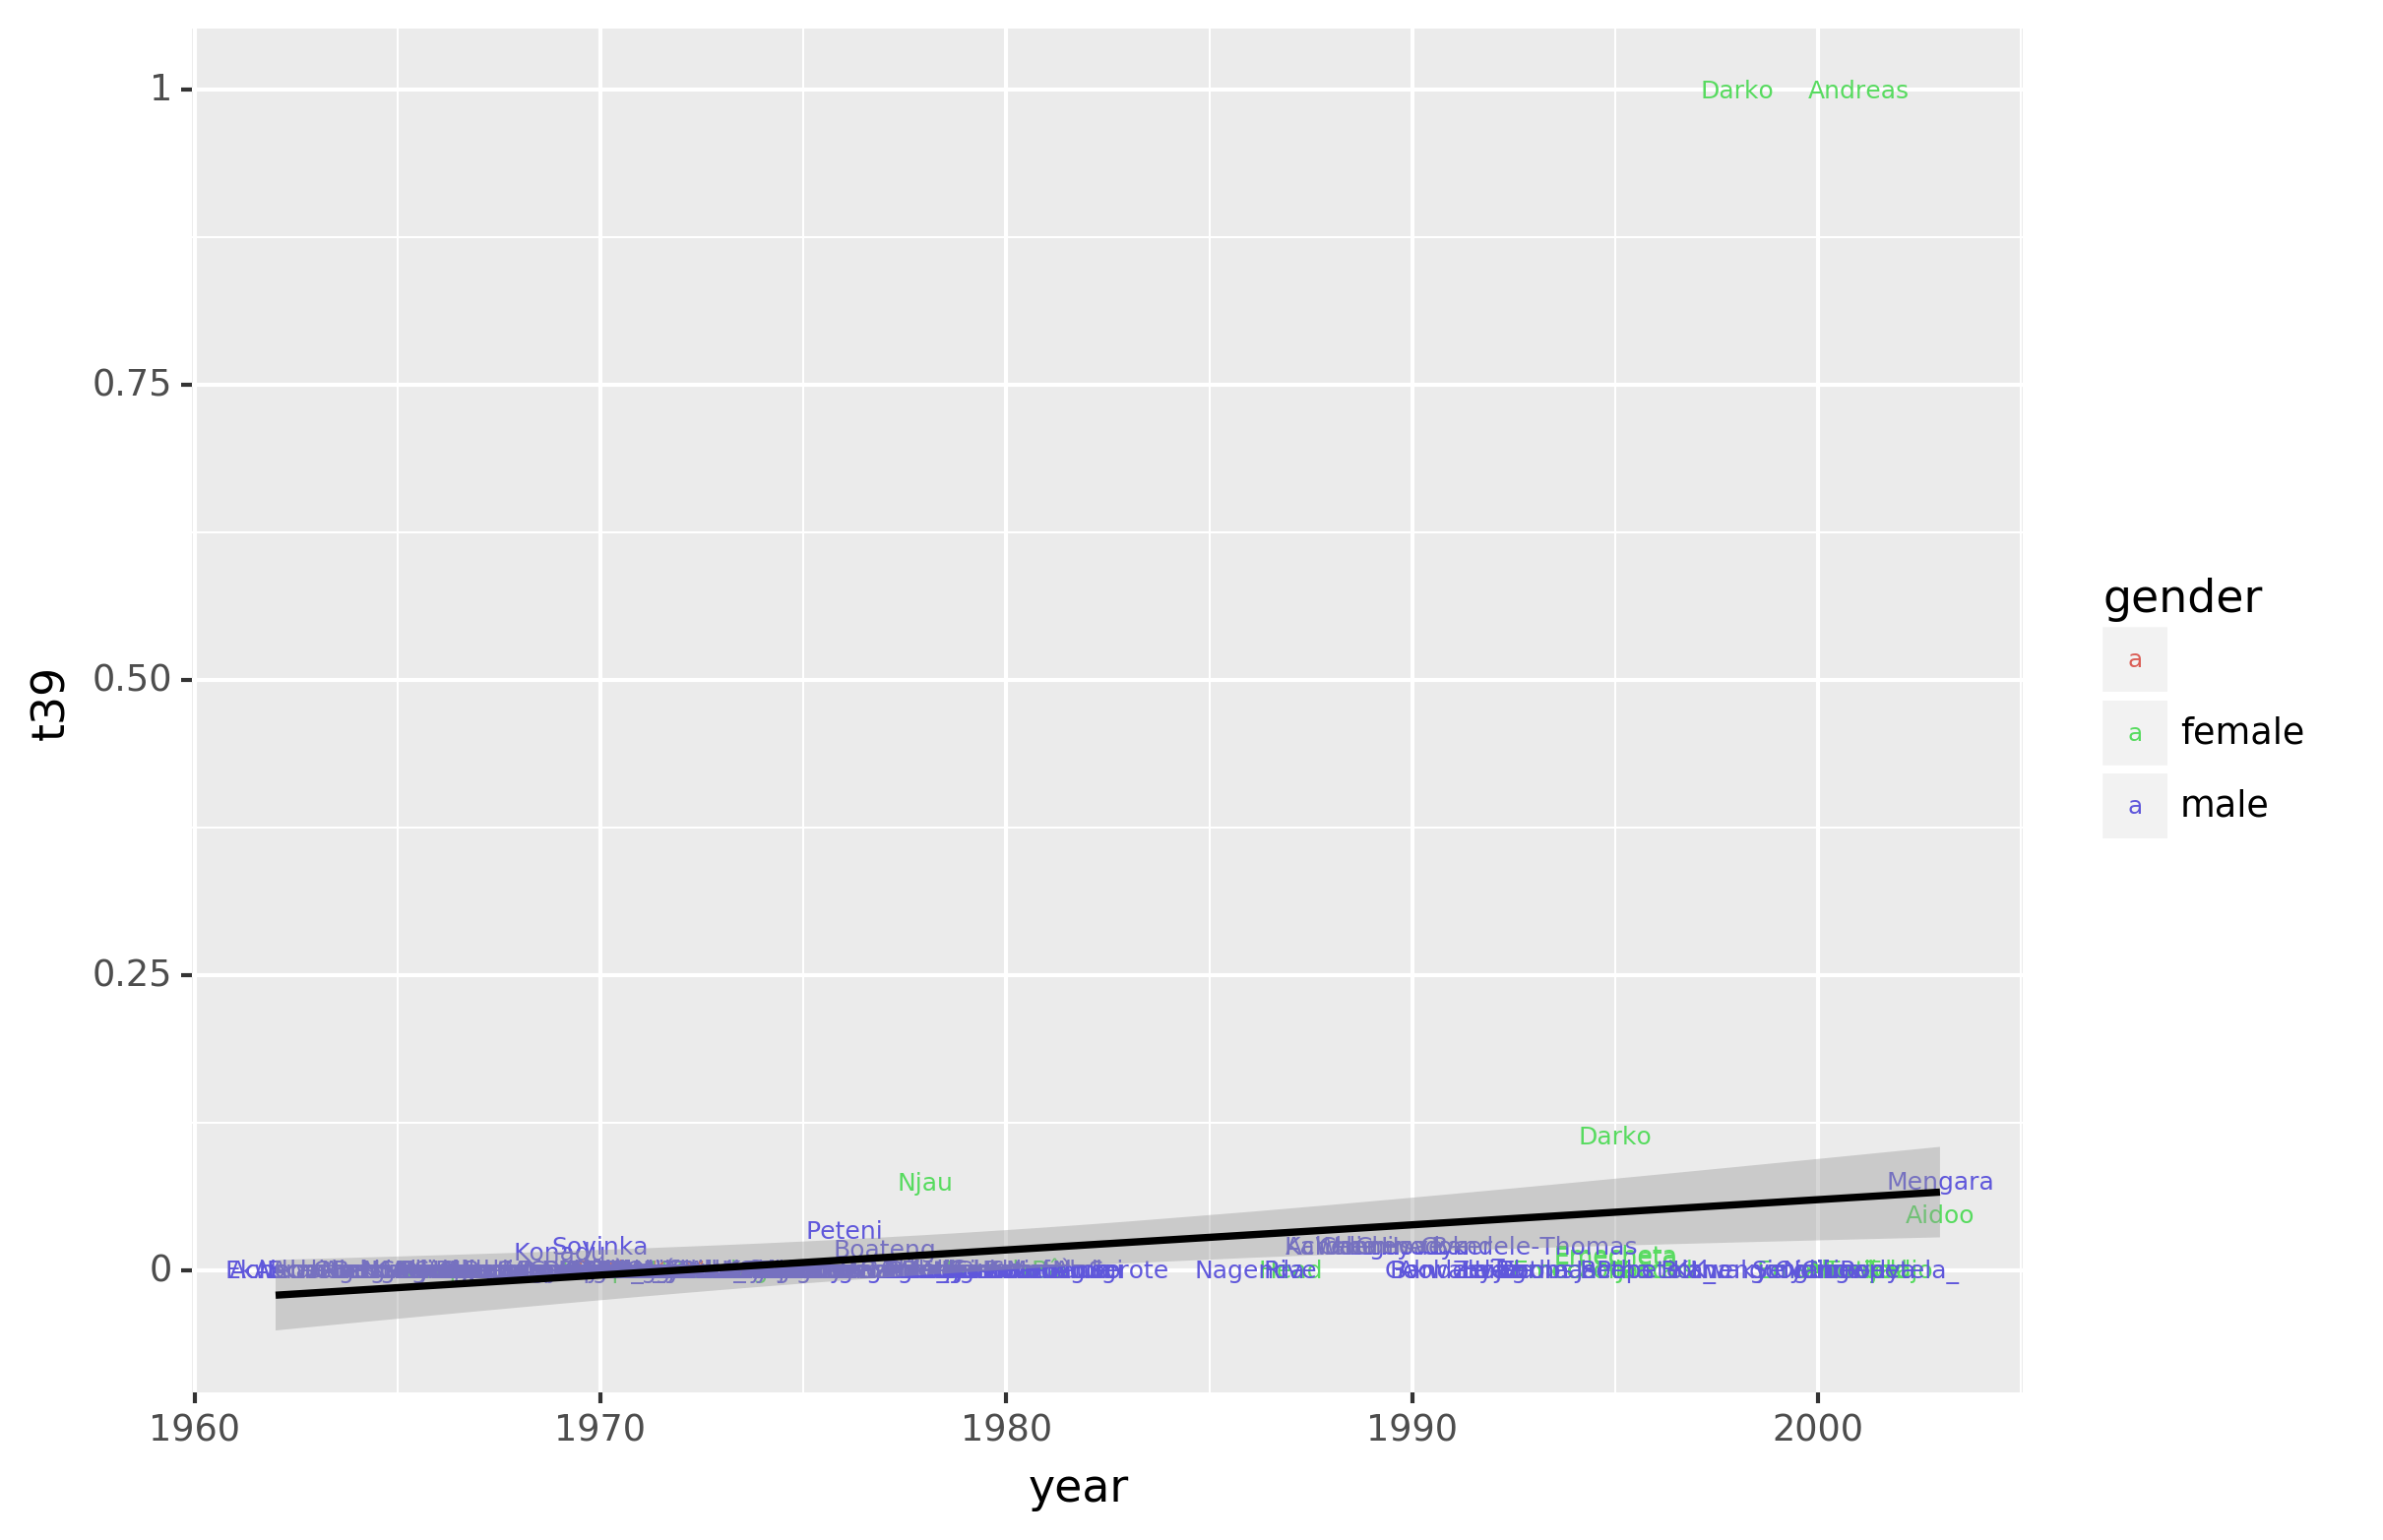

<ggplot: (8785375735965)>

In [72]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't39', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig

## Let's took at t42

In [73]:
import plotnine as p9
p9.options.figure_size=(8,6)
p9.options.dpi = 300

In [74]:
#filtering
figdf = doctopicdf_meta#.query('t39>0')
figdf

,author,title,year,fn,old_fn,have,hitem_id,number,genre,anthology,...,t45,t46,t47,t48,t49,t5,t6,t7,t8,t9
id,,,,,,,,,,,,,,,,,,,,,
"Ngugi,The_River_Between,1965","Ngugi wa Thiong'o (as Ngugi, James)",The River Between,1965,"Ngugi,The_River_Between,1965.txt",,yes,,17.0,novel,no,...,0.000000,0.00,0.000000,0.00,0.999399,0.000000,0.00,0.000000,0.00,0.000000
"Ngugi,A_Grain_of_Wheat,1967","Ngugi wa Thiong'o (as Ngugi, James)",A Grain of Wheat.,1967,"Ngugi,A_Grain_of_Wheat,1967.txt",,yes,,36.0,novel,no,...,0.000000,0.00,0.161085,0.00,0.569182,0.000000,0.00,0.000000,0.00,0.000000
"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969","Armah, Ayi Kwei",The Beautyful Ones Are Not Yet Born. (Boston: ...,1969,"Armah,The_Beautyful_Ones_Are_Not_Yet_Born,1969...",,yes,,43.0,novel,no,...,0.000000,0.00,0.451676,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.537048
"Ousmane,God's_Bits_of_Wood,1970","Ousmane, Sembene",God's Bits of Wood.,1970,"Ousmane,God's_Bits_of_Wood,1970.txt",,yes,,63.0,novel,no,...,0.000000,0.00,0.377053,0.00,0.000000,0.000000,0.00,0.031023,0.00,0.000000
"Soyinka,The_Interpreters,1970","Soyinka, Wole",The Interpreters.,1970,"Soyinka,The_Interpreters,1970.txt",,yes,,76.0,novel,no,...,0.020000,0.02,0.020000,0.02,0.020000,0.020000,0.02,0.020000,0.02,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tadjo,As_the_Crow_Flies,2001","Tadjo, Veronique",As the Crow Flies,2001,"Tadjo,As_the_Crow_Flies,2001.txt",,yes,,,novel,no,...,0.000000,0.00,0.404847,0.00,0.000000,0.000000,0.00,0.029191,0.00,0.000000
"Pepetela_,Return_of_the_Water_Spirit,2002",Pepetela,Return of the Water Spirit,2002,"Pepetela_,Return_of_the_Water_Spirit,2002.txt",,yes,,,novel,no,...,0.000000,0.00,0.000000,0.00,0.000000,0.196433,0.00,0.000000,0.00,0.000000
"Tadjo,The_Shadow_of_Imana,2002","Tadjo, Veronique",The Shadow of Imana,2002,"Tadjo,The_Shadow_of_Imana,2002.txt",,yes,,,novel,no,...,0.020273,0.00,0.234506,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000


/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

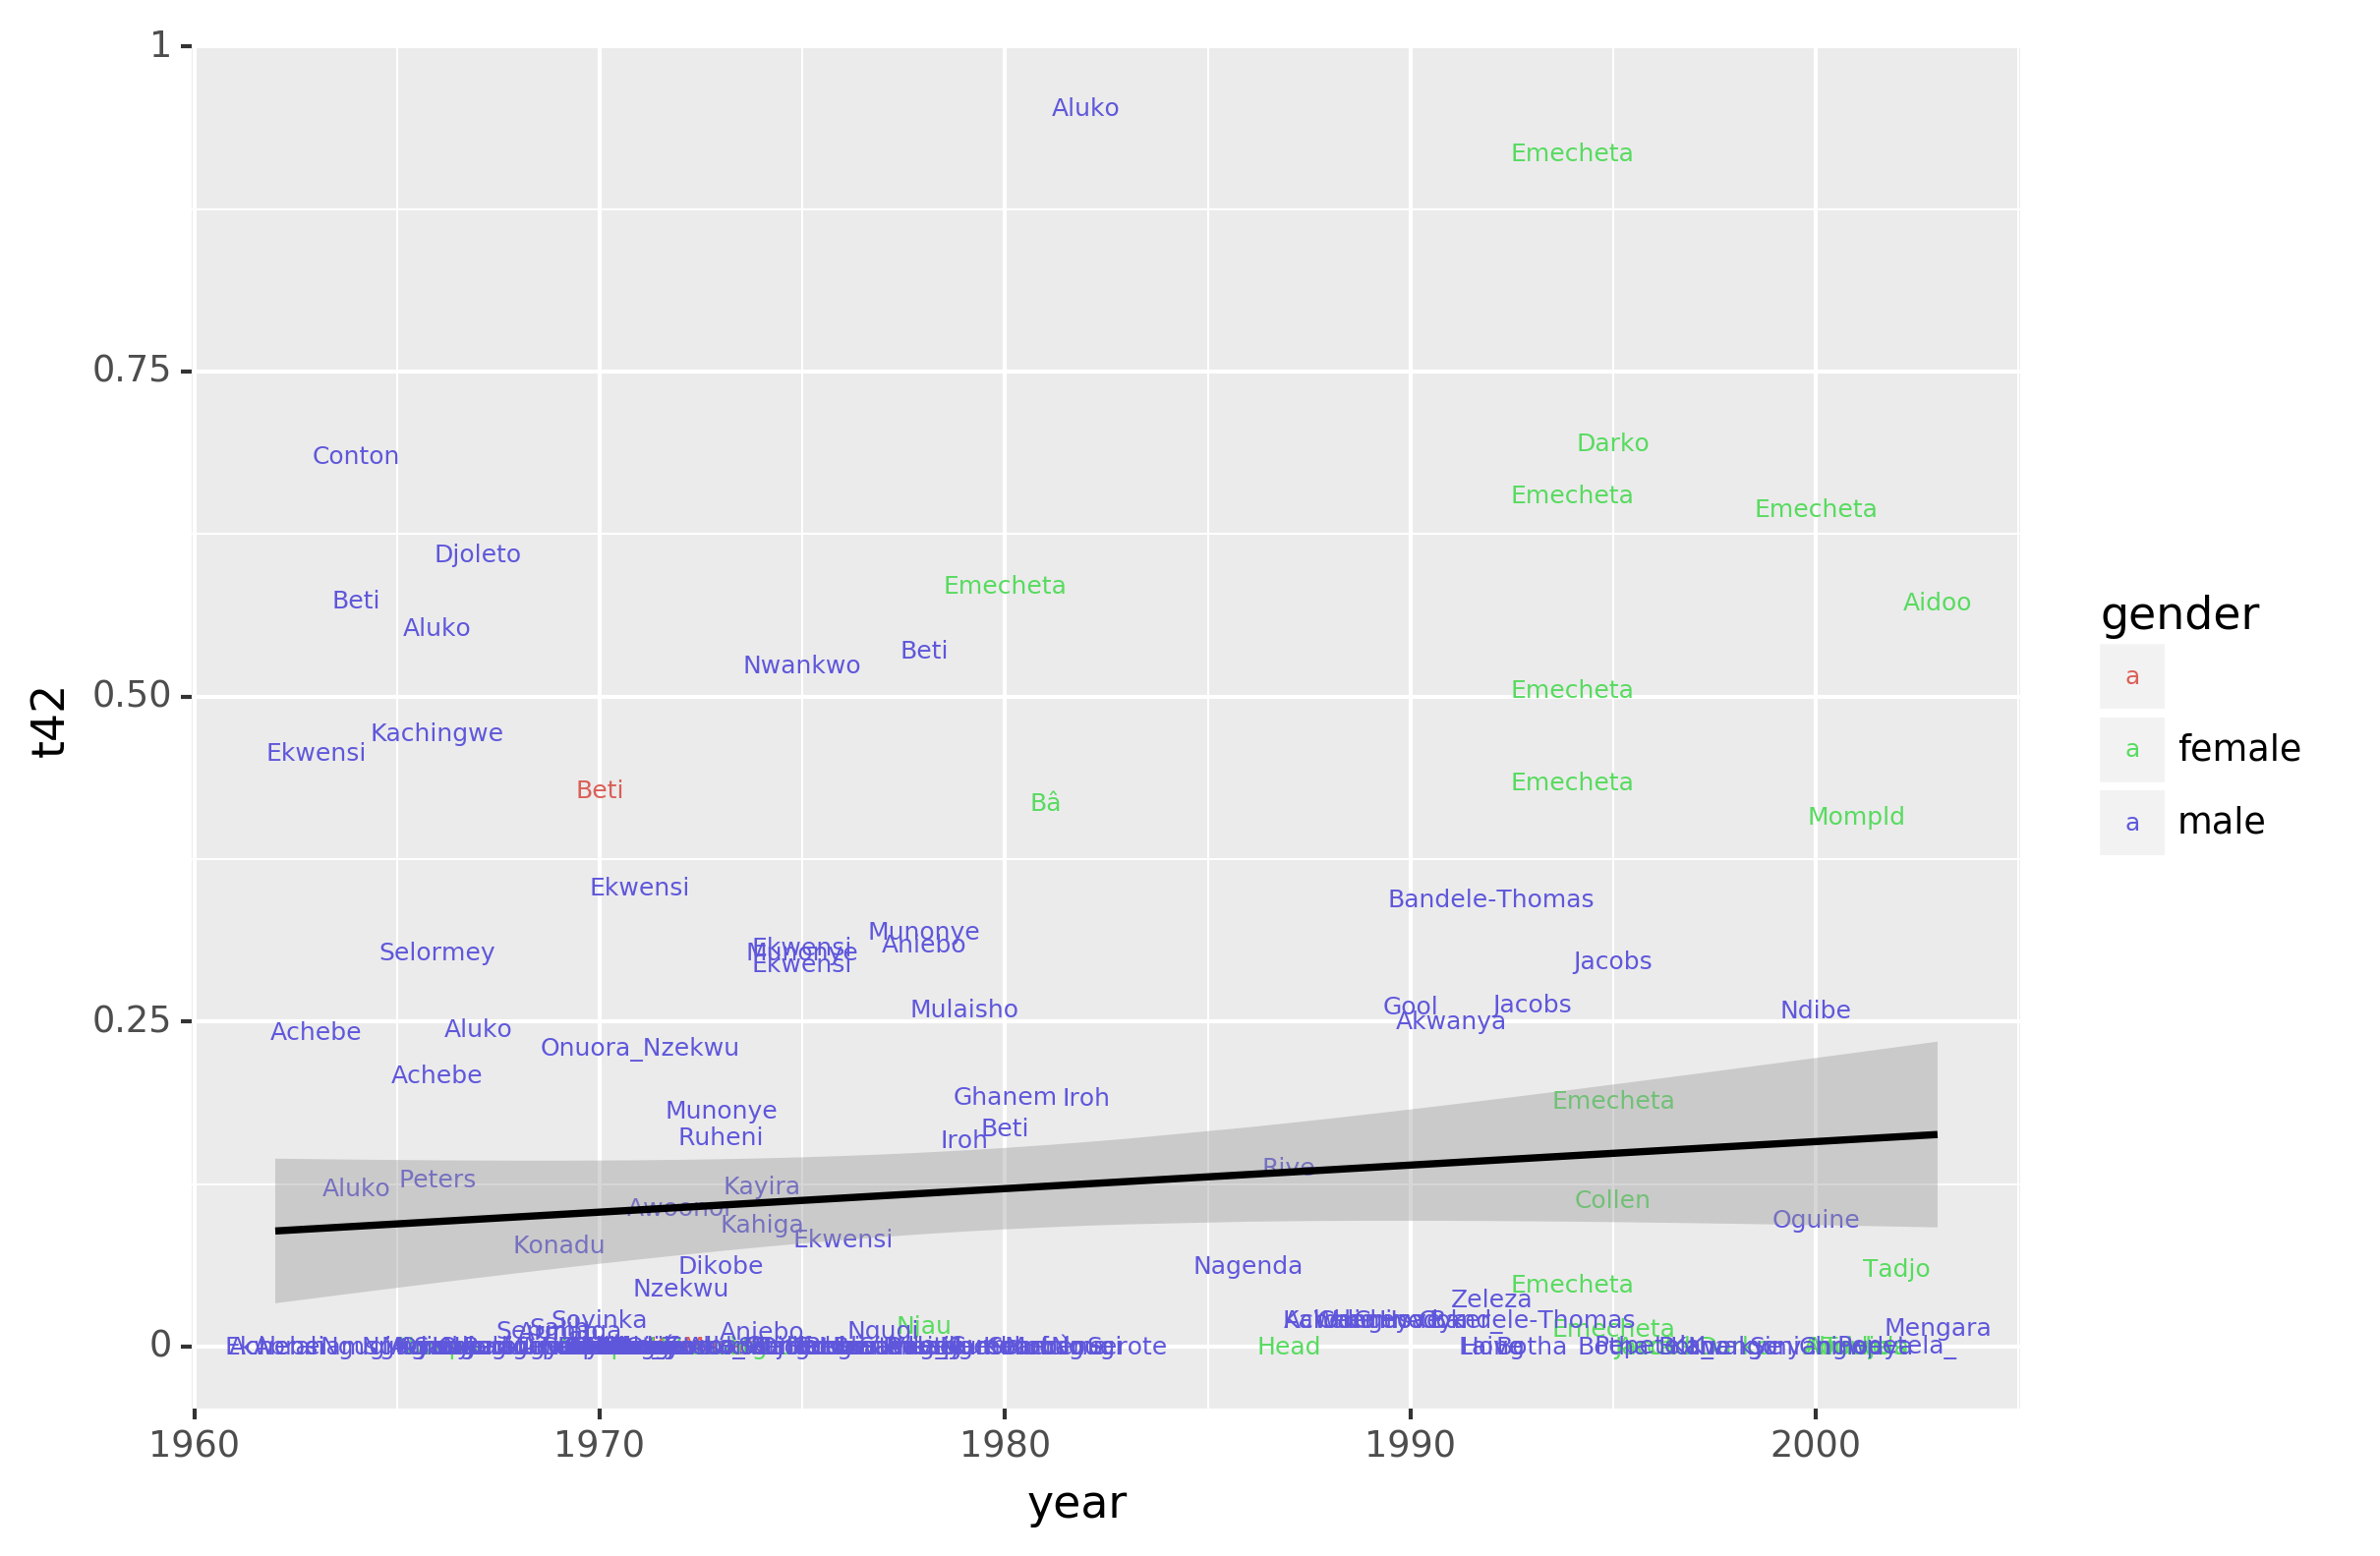

<ggplot: (8785385438981)>

In [75]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't42', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig

## Let's took at t25

In [76]:
import plotnine as p9
p9.options.figure_size=(8,6)
p9.options.dpi = 300

In [77]:
#filtering
#figdf = doctopicdf_meta#.query('t39>0')
#figdf

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

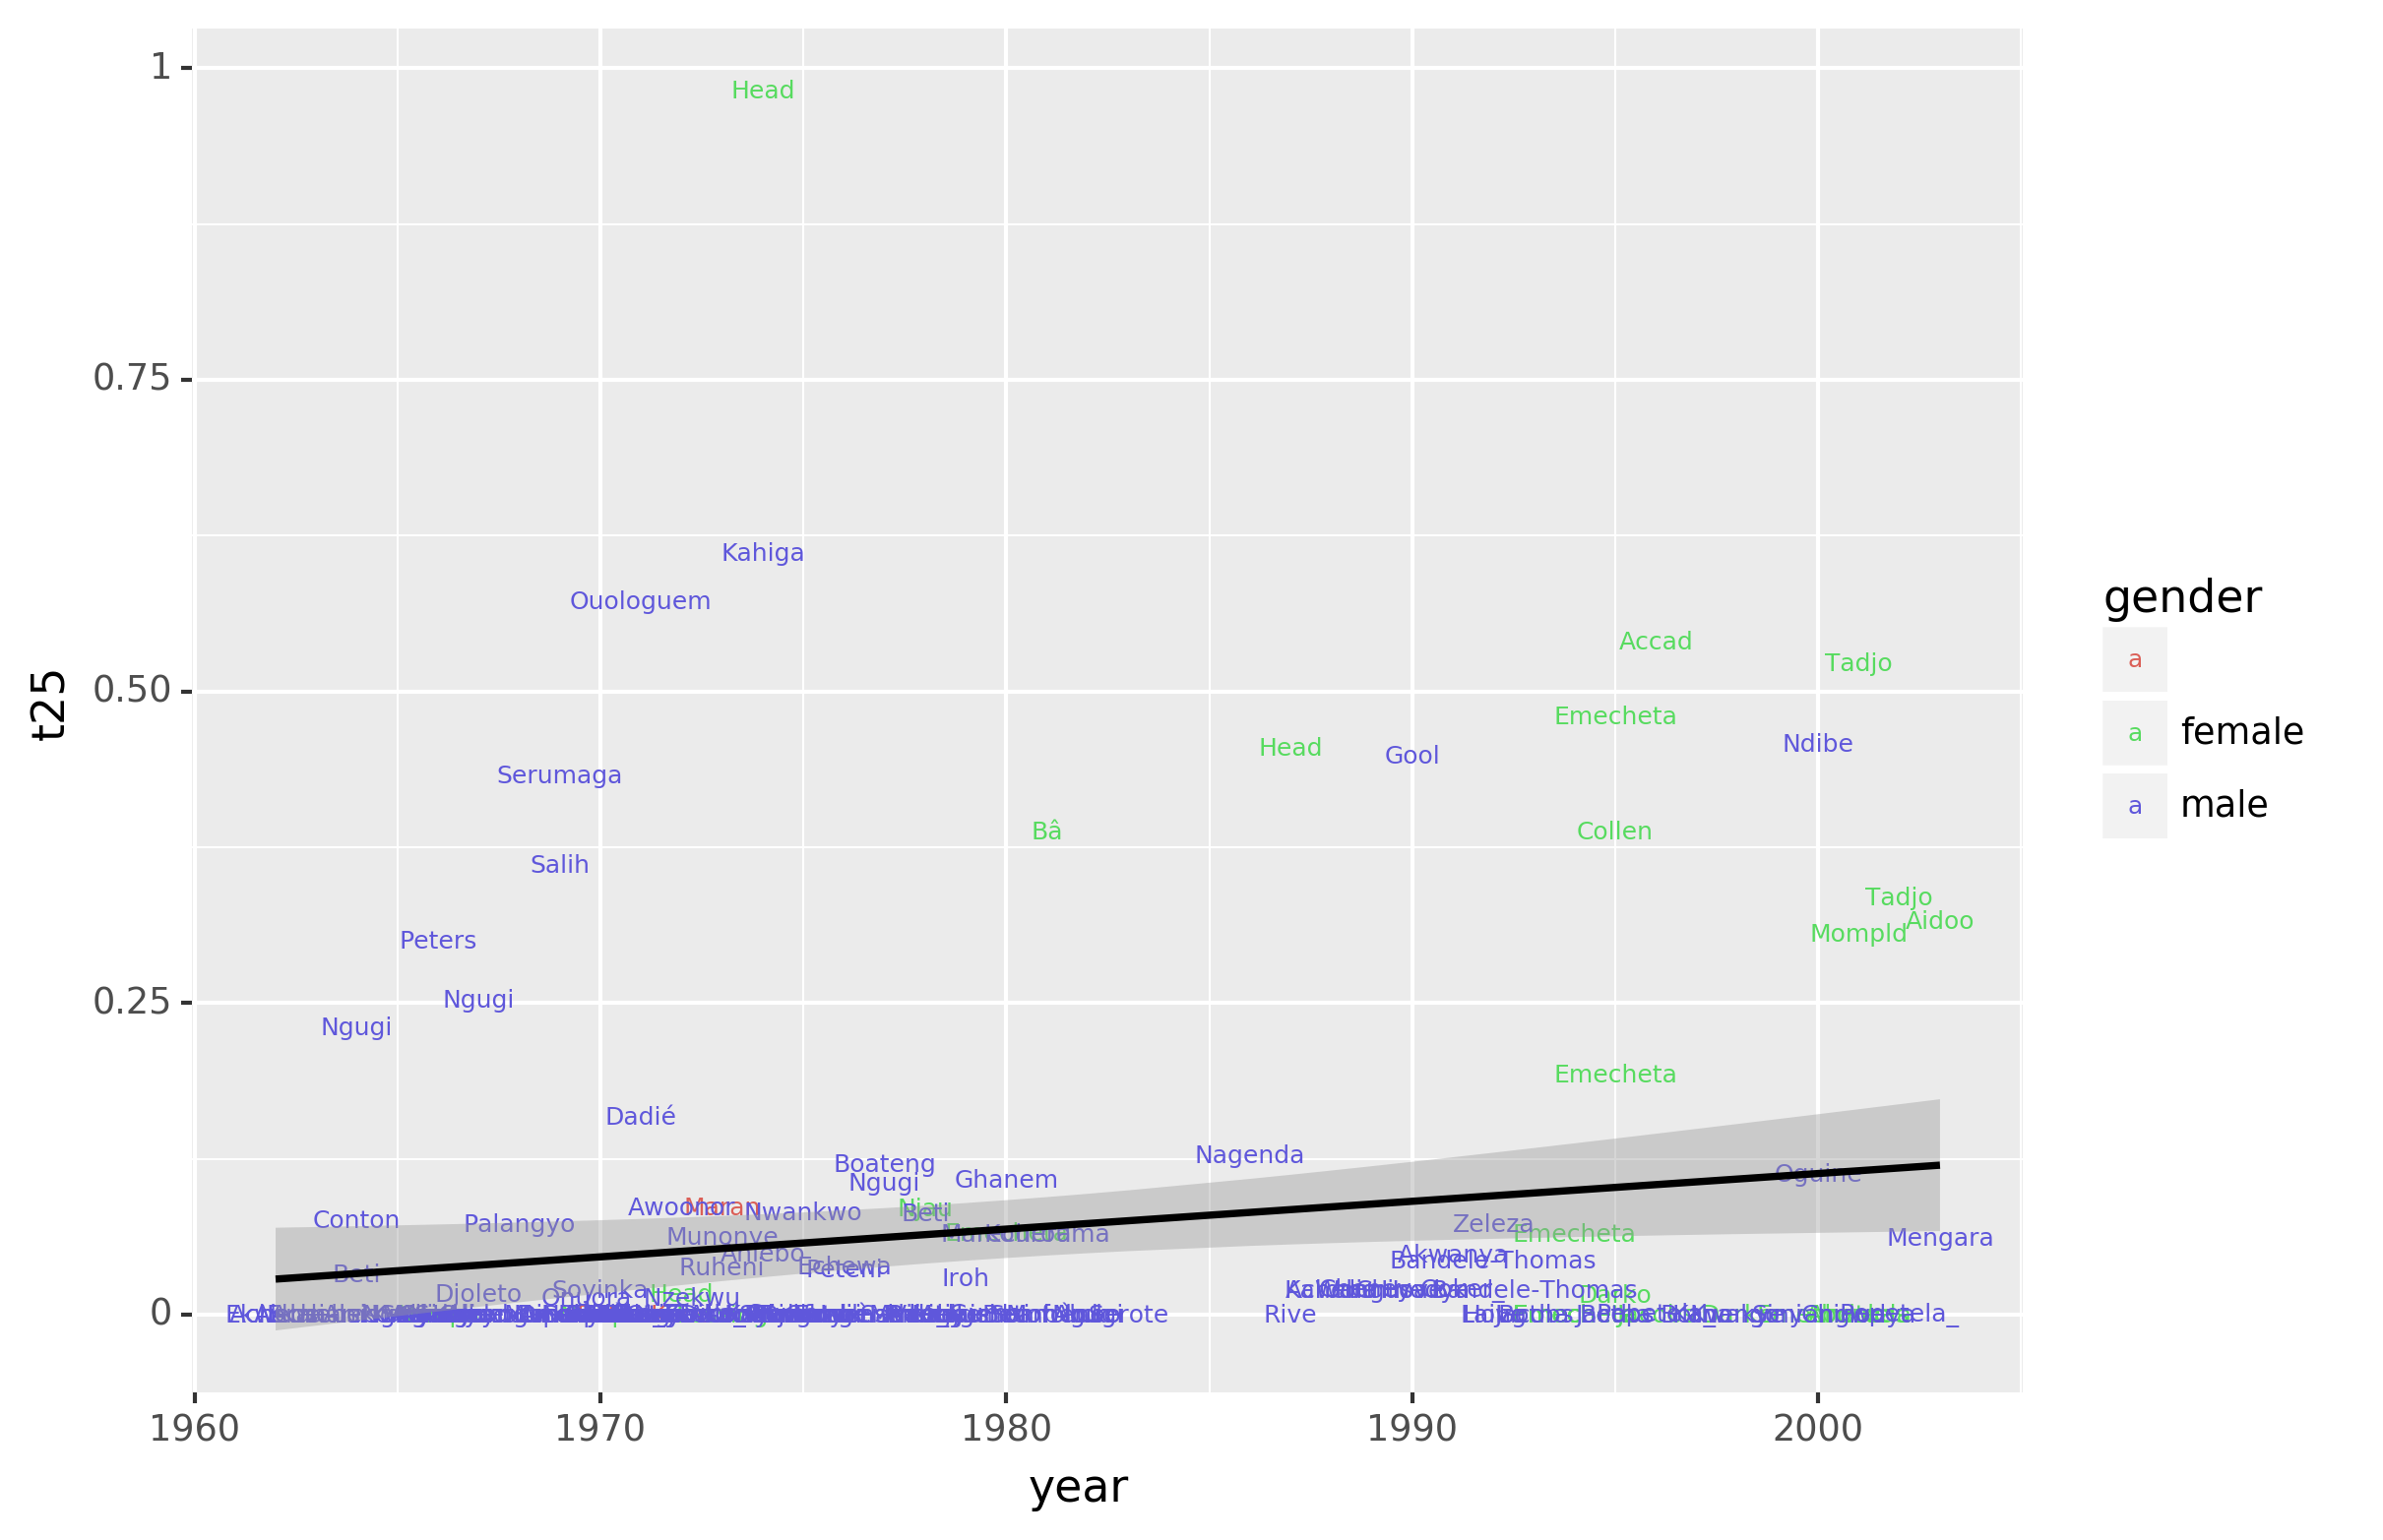

<ggplot: (8785375870825)>

In [78]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't25', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig

## Looking at some of the colonial pastoral topics

In [90]:
## T7
show_topic_words(7)

clan colony camp francs cocoa chap peasants lorry whites governor blacks lad officials inhabitants official soldier administration kilometres missionary boss clans troops jungle licence companions peasant zeal port pidgin courtyard district test magician metres host ranks sacks prisoner tasks capital scales traveller suburbs astonishment platform arrivals gestures avenue generosity rank spectacle champion sack nightfall employees apprentice feast indignation union hesitation beast employer elections contrary route population destiny cell interior tumult hero bucket skill eve posts indifference resentment prisoners monster uproar maize newcomers driving fellows merchants midday masters illusion director capture camps wandering traditions disappearance council palace porters necessity sobs defeat 

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

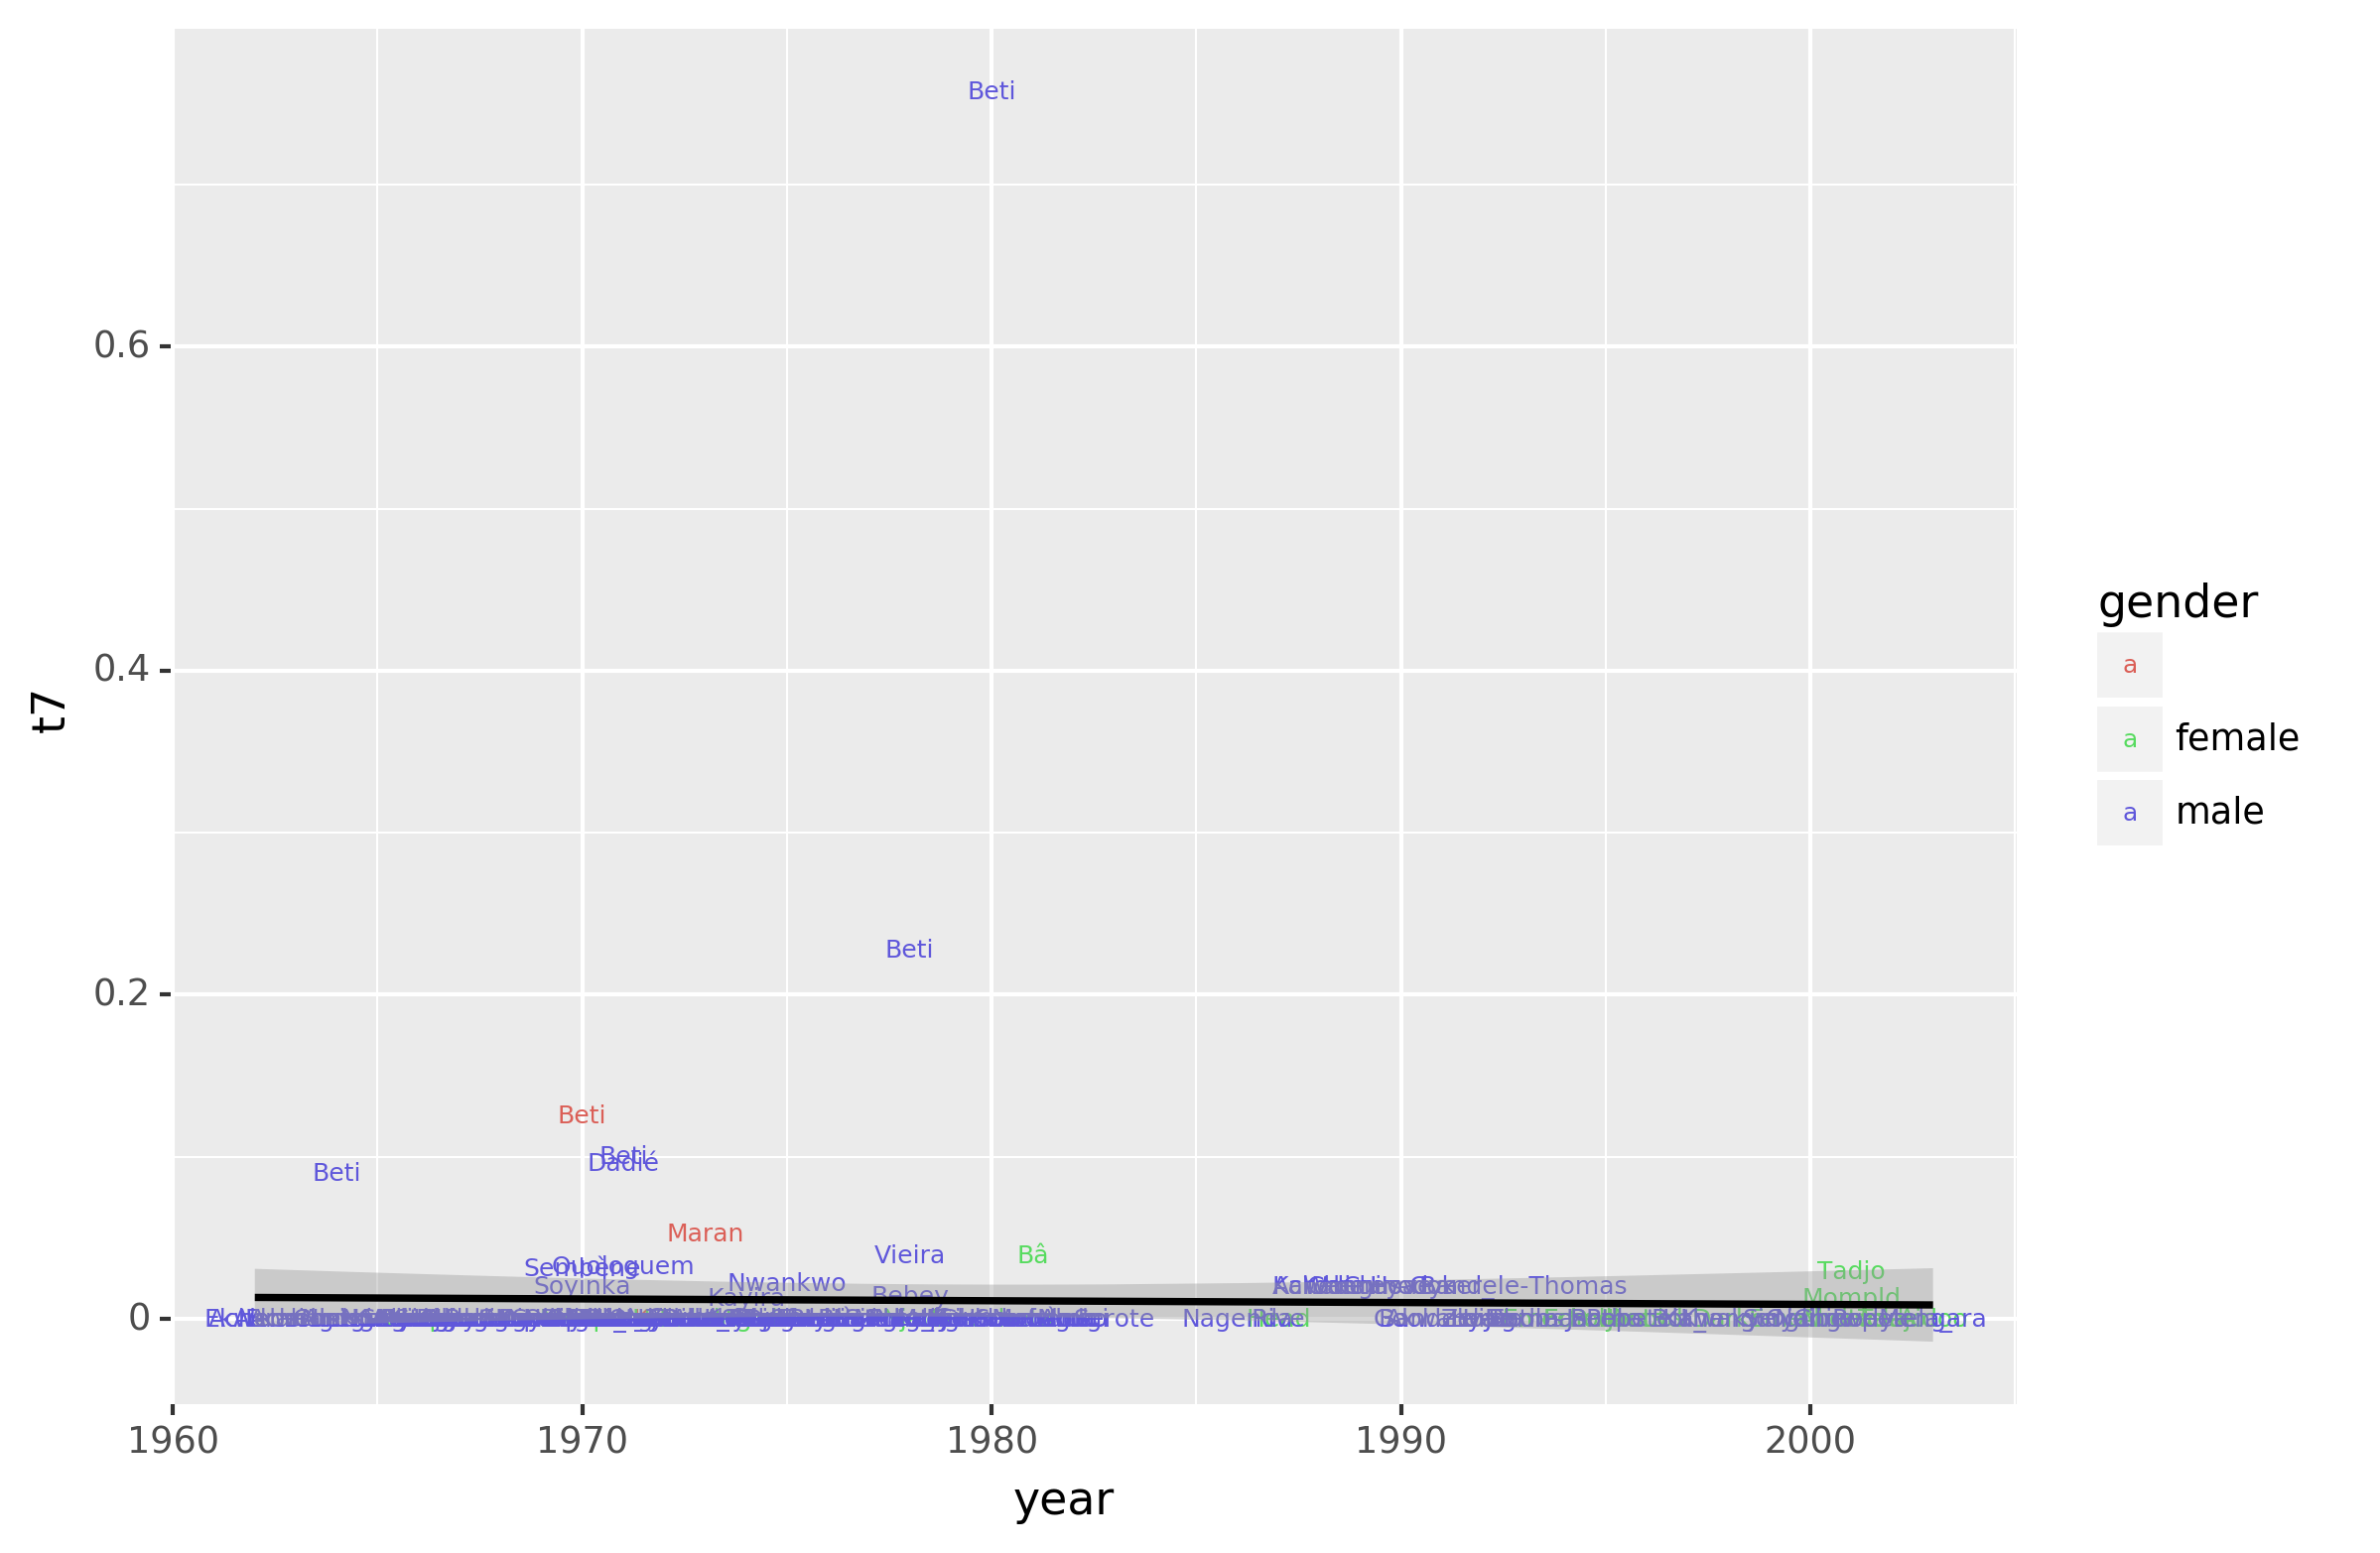

<ggplot: (8785380045725)>

In [88]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't7', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig

### This one is almost entirely the work of Mongo Beti

In [92]:
#T9
show_topic_words(9)

whites kola veranda medal constable cook dowry coffin engineer nut yams boat clerk jacket courtyard gin lad interpreter schnapps buttocks libation nuts nurse location banana sentry bye latrine tailor pepper curse conductor bamboo headmaster pastor coins cloths truck shillings guide thieves operation approval township cassava lagoon leave sergeant cement gleam sixpence cemetery houseboy messengers beach catechist maid shilling maize yam proverb prisoner jail brass natives towel boats moonlight fan murmur lorry debt constables pan raffia mats whisky fishing sponge kerosene riches smallpox lavatory bathroom elephant parcel timber attendant soap tortoise leaf dancers mistress penny cocoa astonishment steward lamps discussions shore 

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

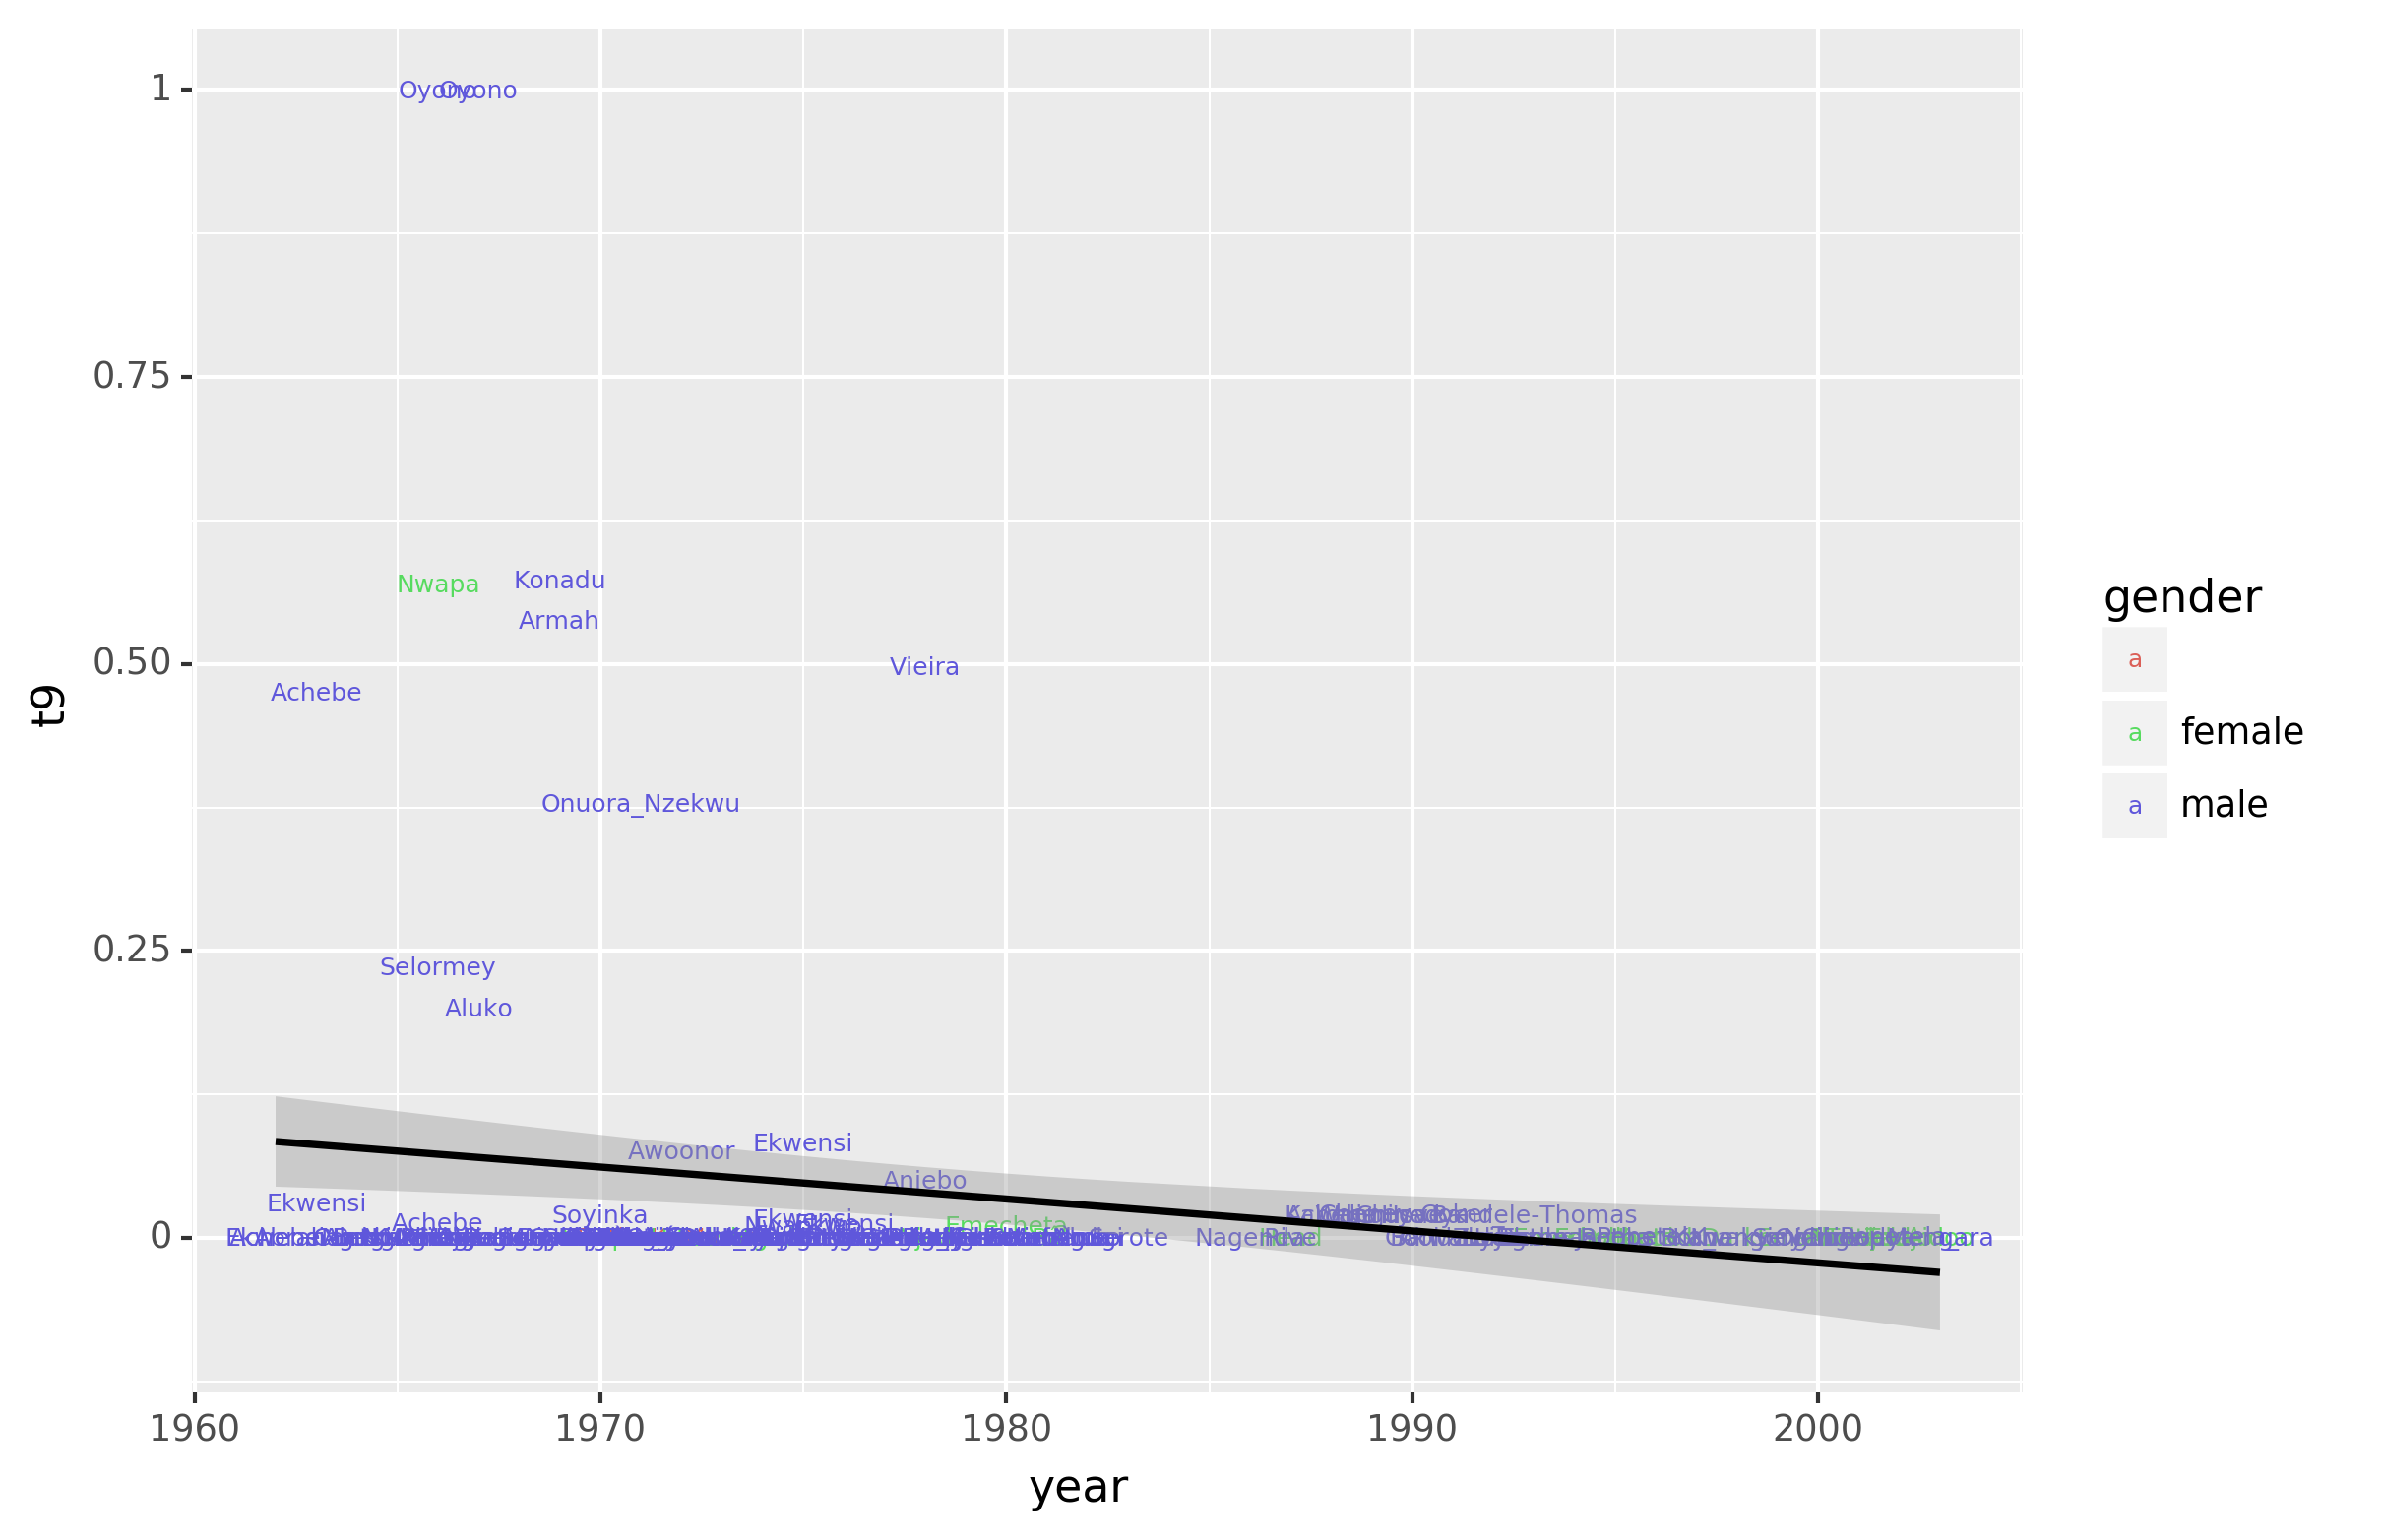

<ggplot: (8785380147249)>

In [93]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't9', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig

## This one is more diverse in authorship - Oyono, Achebe, etc -- but then drops off the map

In [96]:
#T15
show_topic_words(15)

rape crops villagers novel brush dew porridge oxen maize sunset chickens graves reader cow vultures witchcraft homestead headman millet doorway necklace grain axe duel pump blankets acres witches commandant crop wire groundnuts rocks frogs border grazing ghosts nuts kraal granite drought poles hunting brick organization moonlight herbs bucket worms refugee plot firewood whip clearing slope fires south knives newcomers agriculture vegetables flames fireflies rivers pitch leaf strike winter log cows forests herd dusk beasts zinc horns grasses buck maker chiefs mango blanket beast production plants demonstration dishes weeds elephant thorn corn kids text midday potatoes ox farming sweets logs buckets 

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

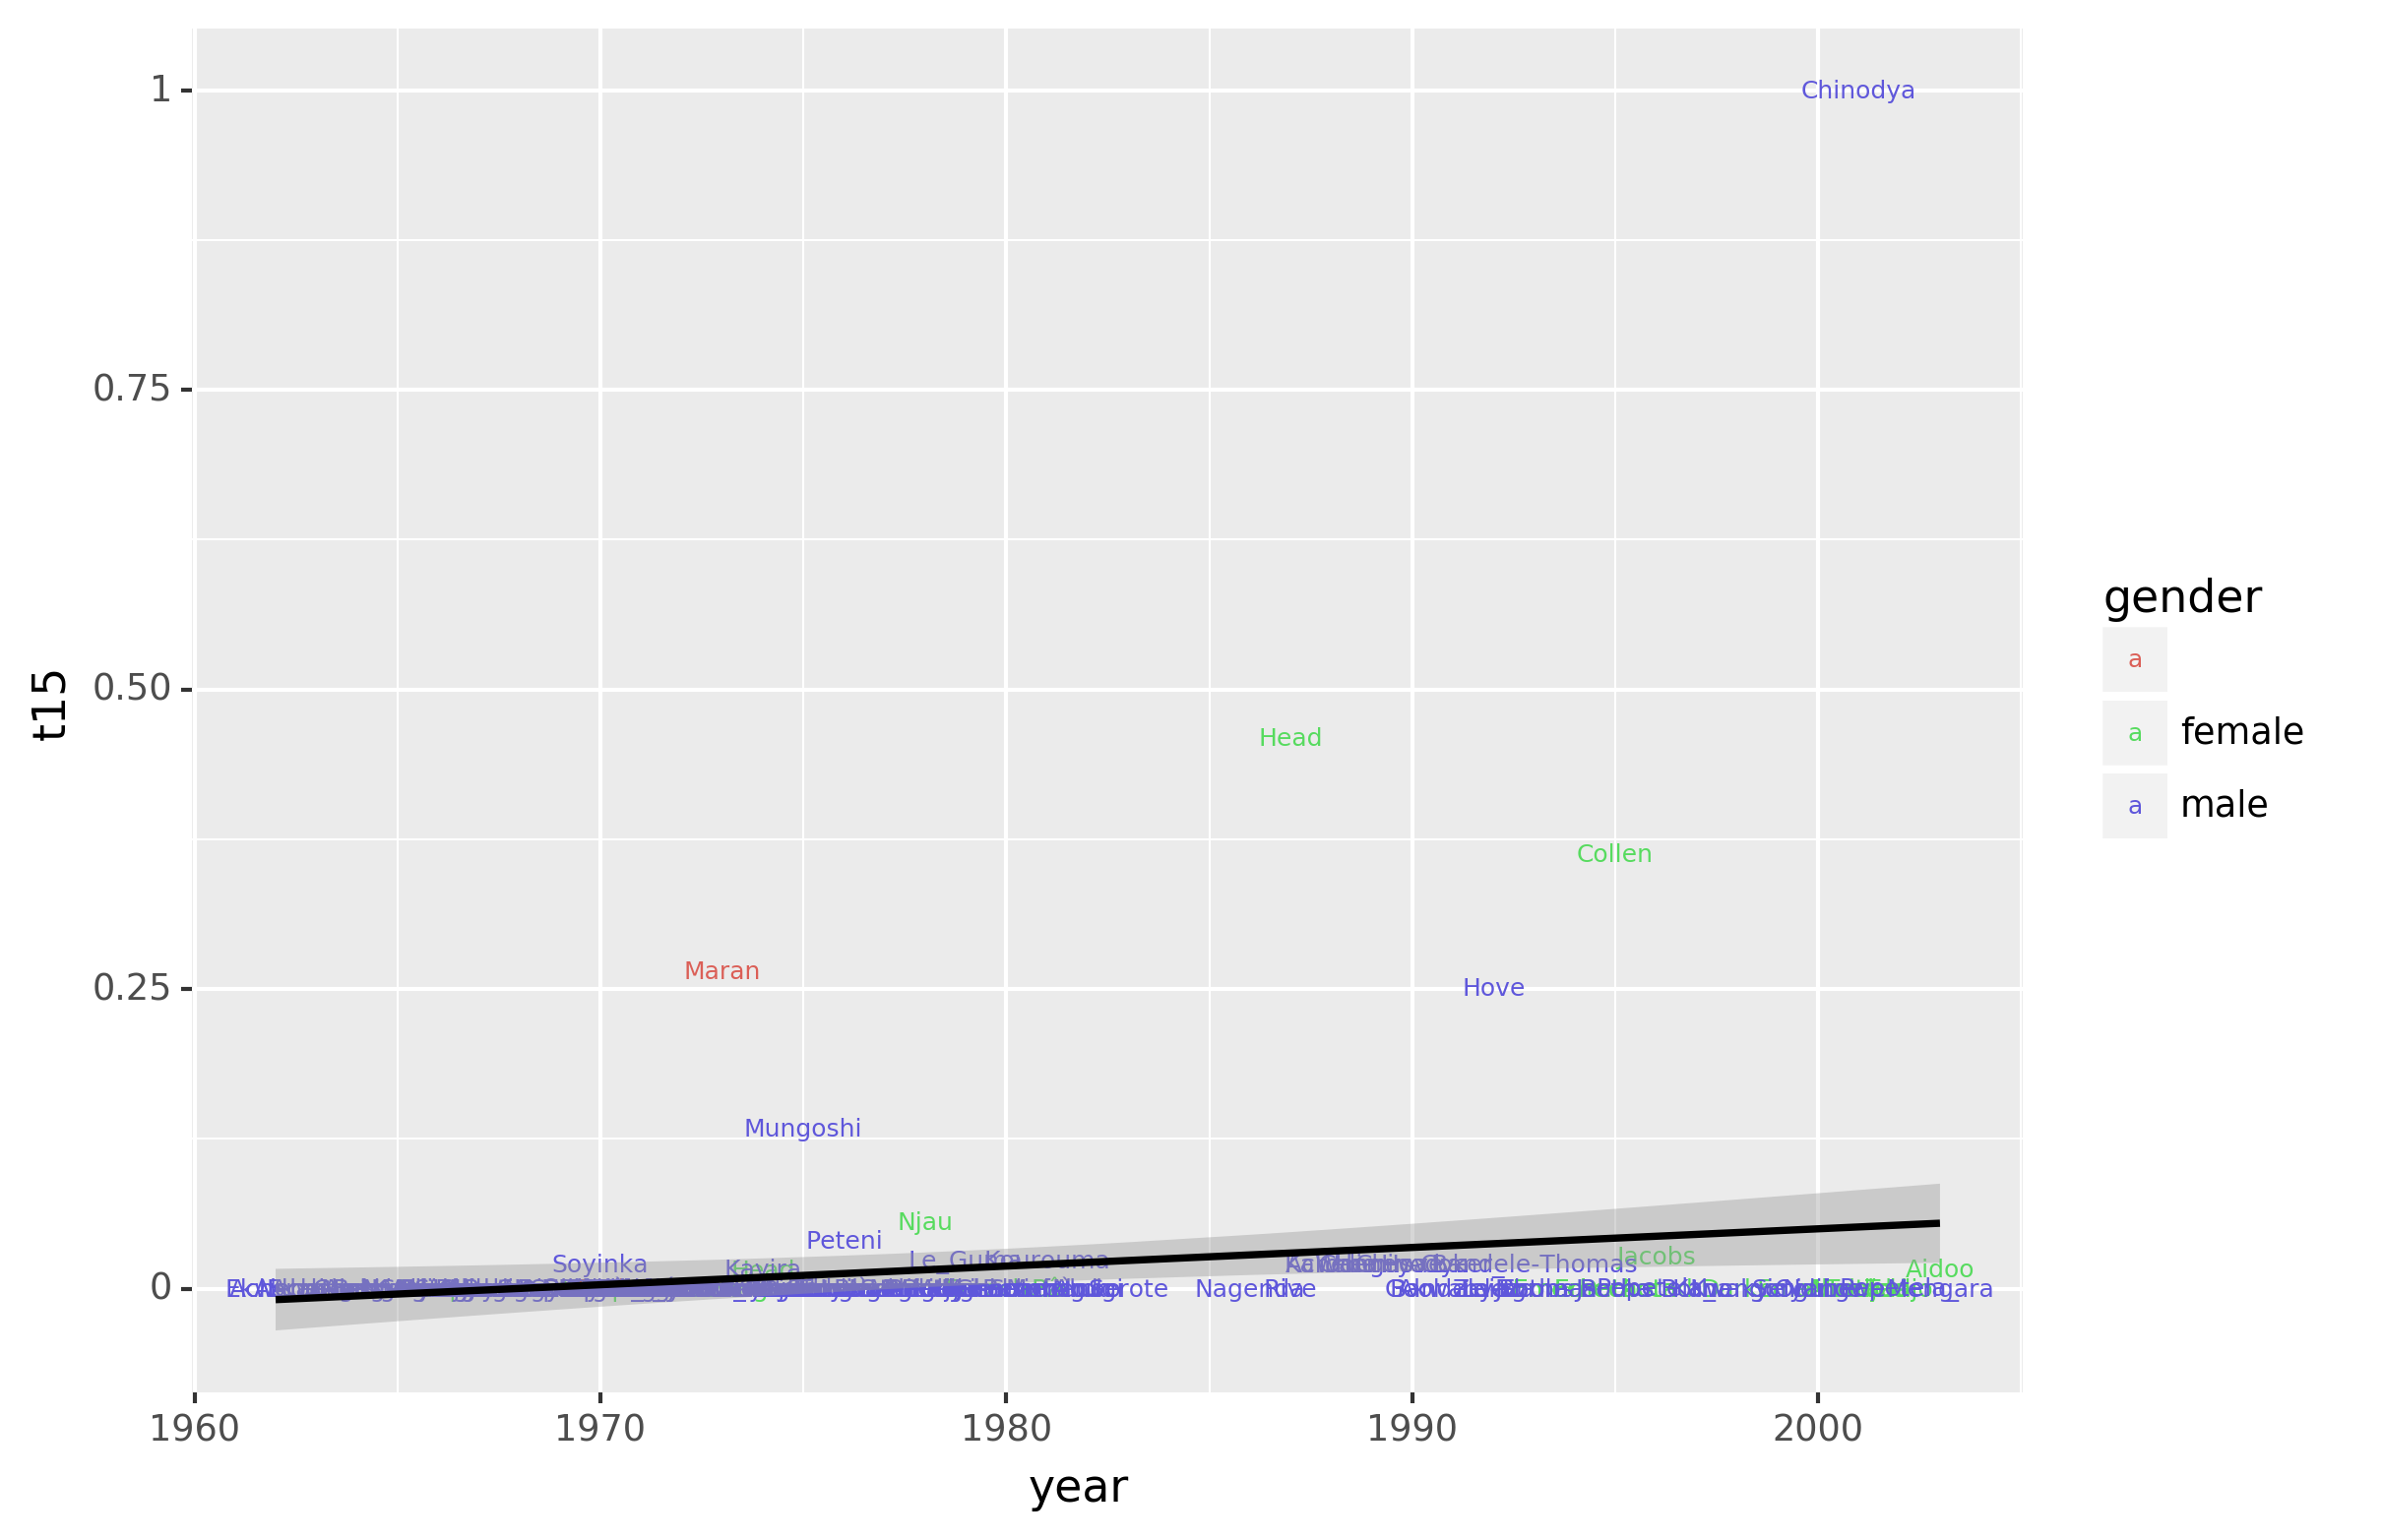

<ggplot: (8785359046301)>

In [94]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't15', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig

In [98]:
#T16
show_topic_words(16)

chiefs administration shillings tax cocoa council congregation lawyer clerk sir chieftaincy district taxes lorry juju palace tour worship appointment salary payment farmers counsel kinsman expenses envelope riots cement salaries hymn magistrate villagers construction officials contractor subjects commission inquiry assessment lawyers stores courts collection mama veranda parlour chairman motion approval territory fund assault proceedings kola crown farmer platform farms royalty writer dais benches concrete arrangements assembly fees lovers constables headquarters preacher lantern youths comrades judgement smallpox appeal horn motor fights guidance pound allowances engineer traitor sermon sixpence operation whistle rites cutting mighty funds instruction judges cycle witchcraft throne allowance consequences bastard 

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

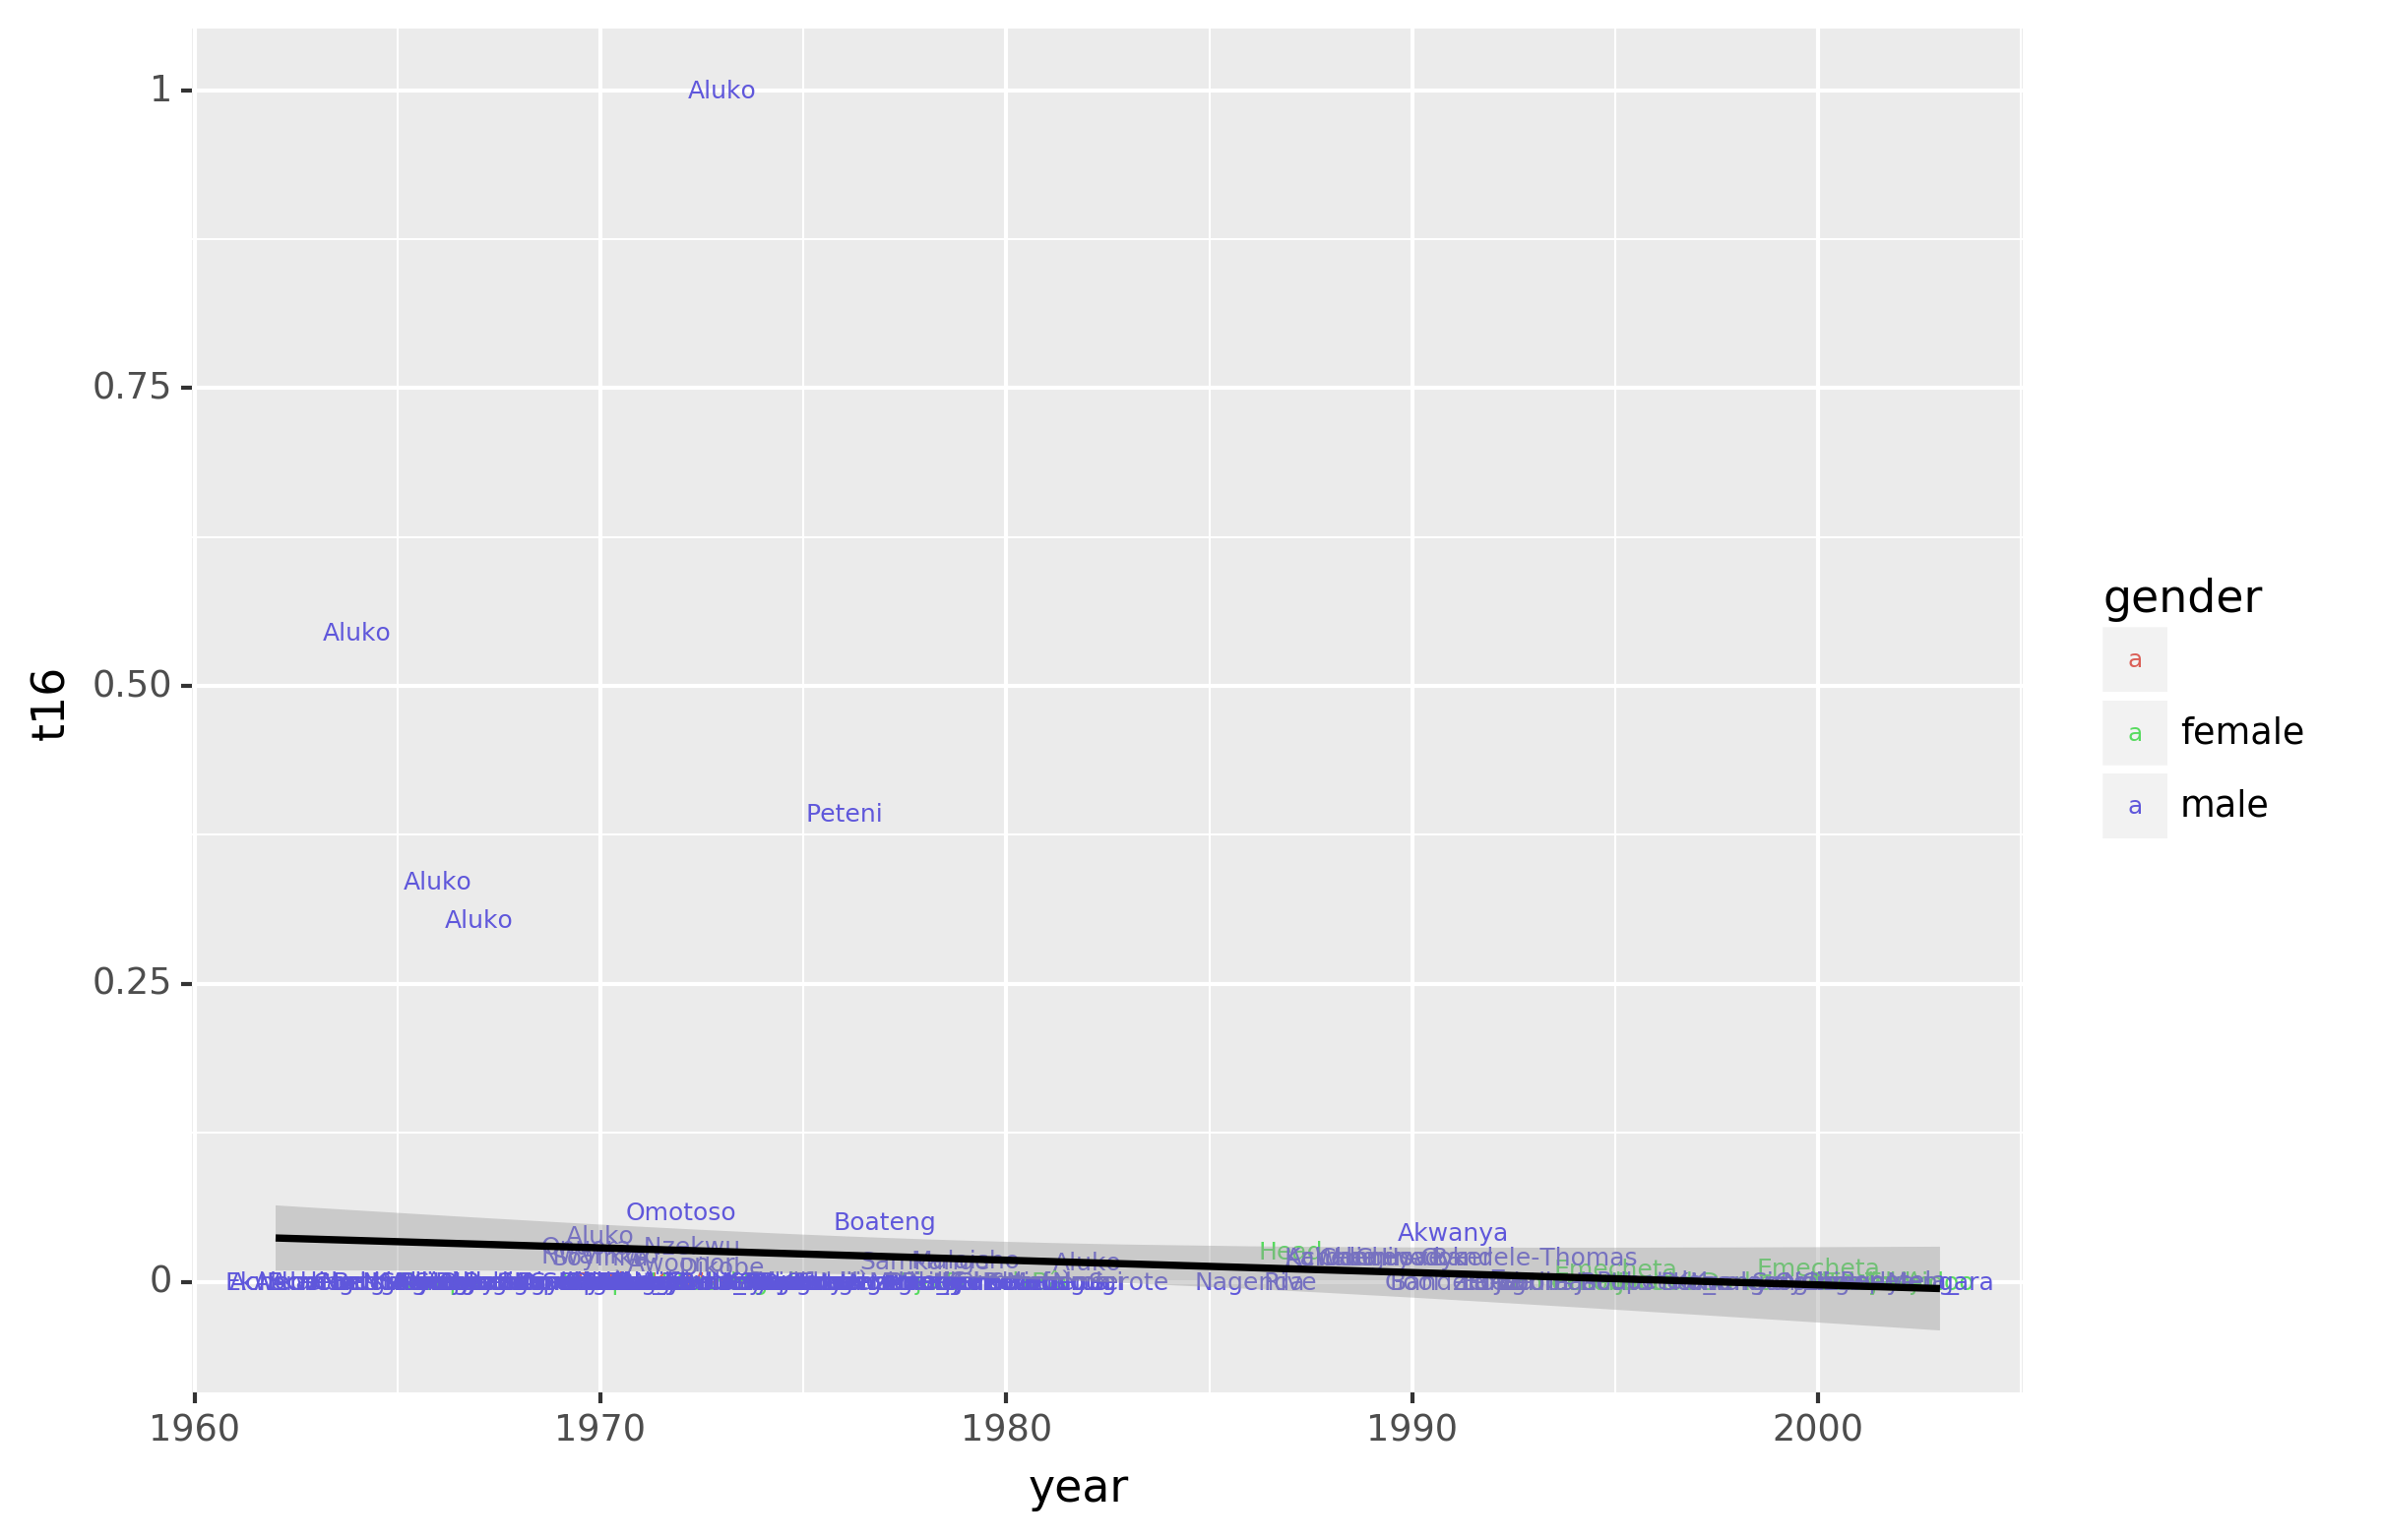

<ggplot: (8785357478437)>

In [95]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't16', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig

### mostly TM Aluko

In [104]:
## colonialism and agriculture
show_topic_words(32)

beans villagers strike lorry shillings priests bicycle yams whiteman camp tribe lawyer sir maize soldier whites veranda kola judge lineage baba cassava headmaster crops principal altar minister courtyard lion detention ridges salvation spear coffin sacrifices truck blanket feast congregation plane platform fees prisoners slaves college yam tins reception district oath missionaries blacks aunt shrine companions committee cell classes officials chickens university kraal administration ages guards catechist thieves wrapper warriors telephone clerk chiefs beach sergeant council pay mistress curse cook arrangements ridge capital whisky boat examination priesthood doorway catechism concrete pepper midday parish chapel banana manager seed sunset corridor warrior boss 

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

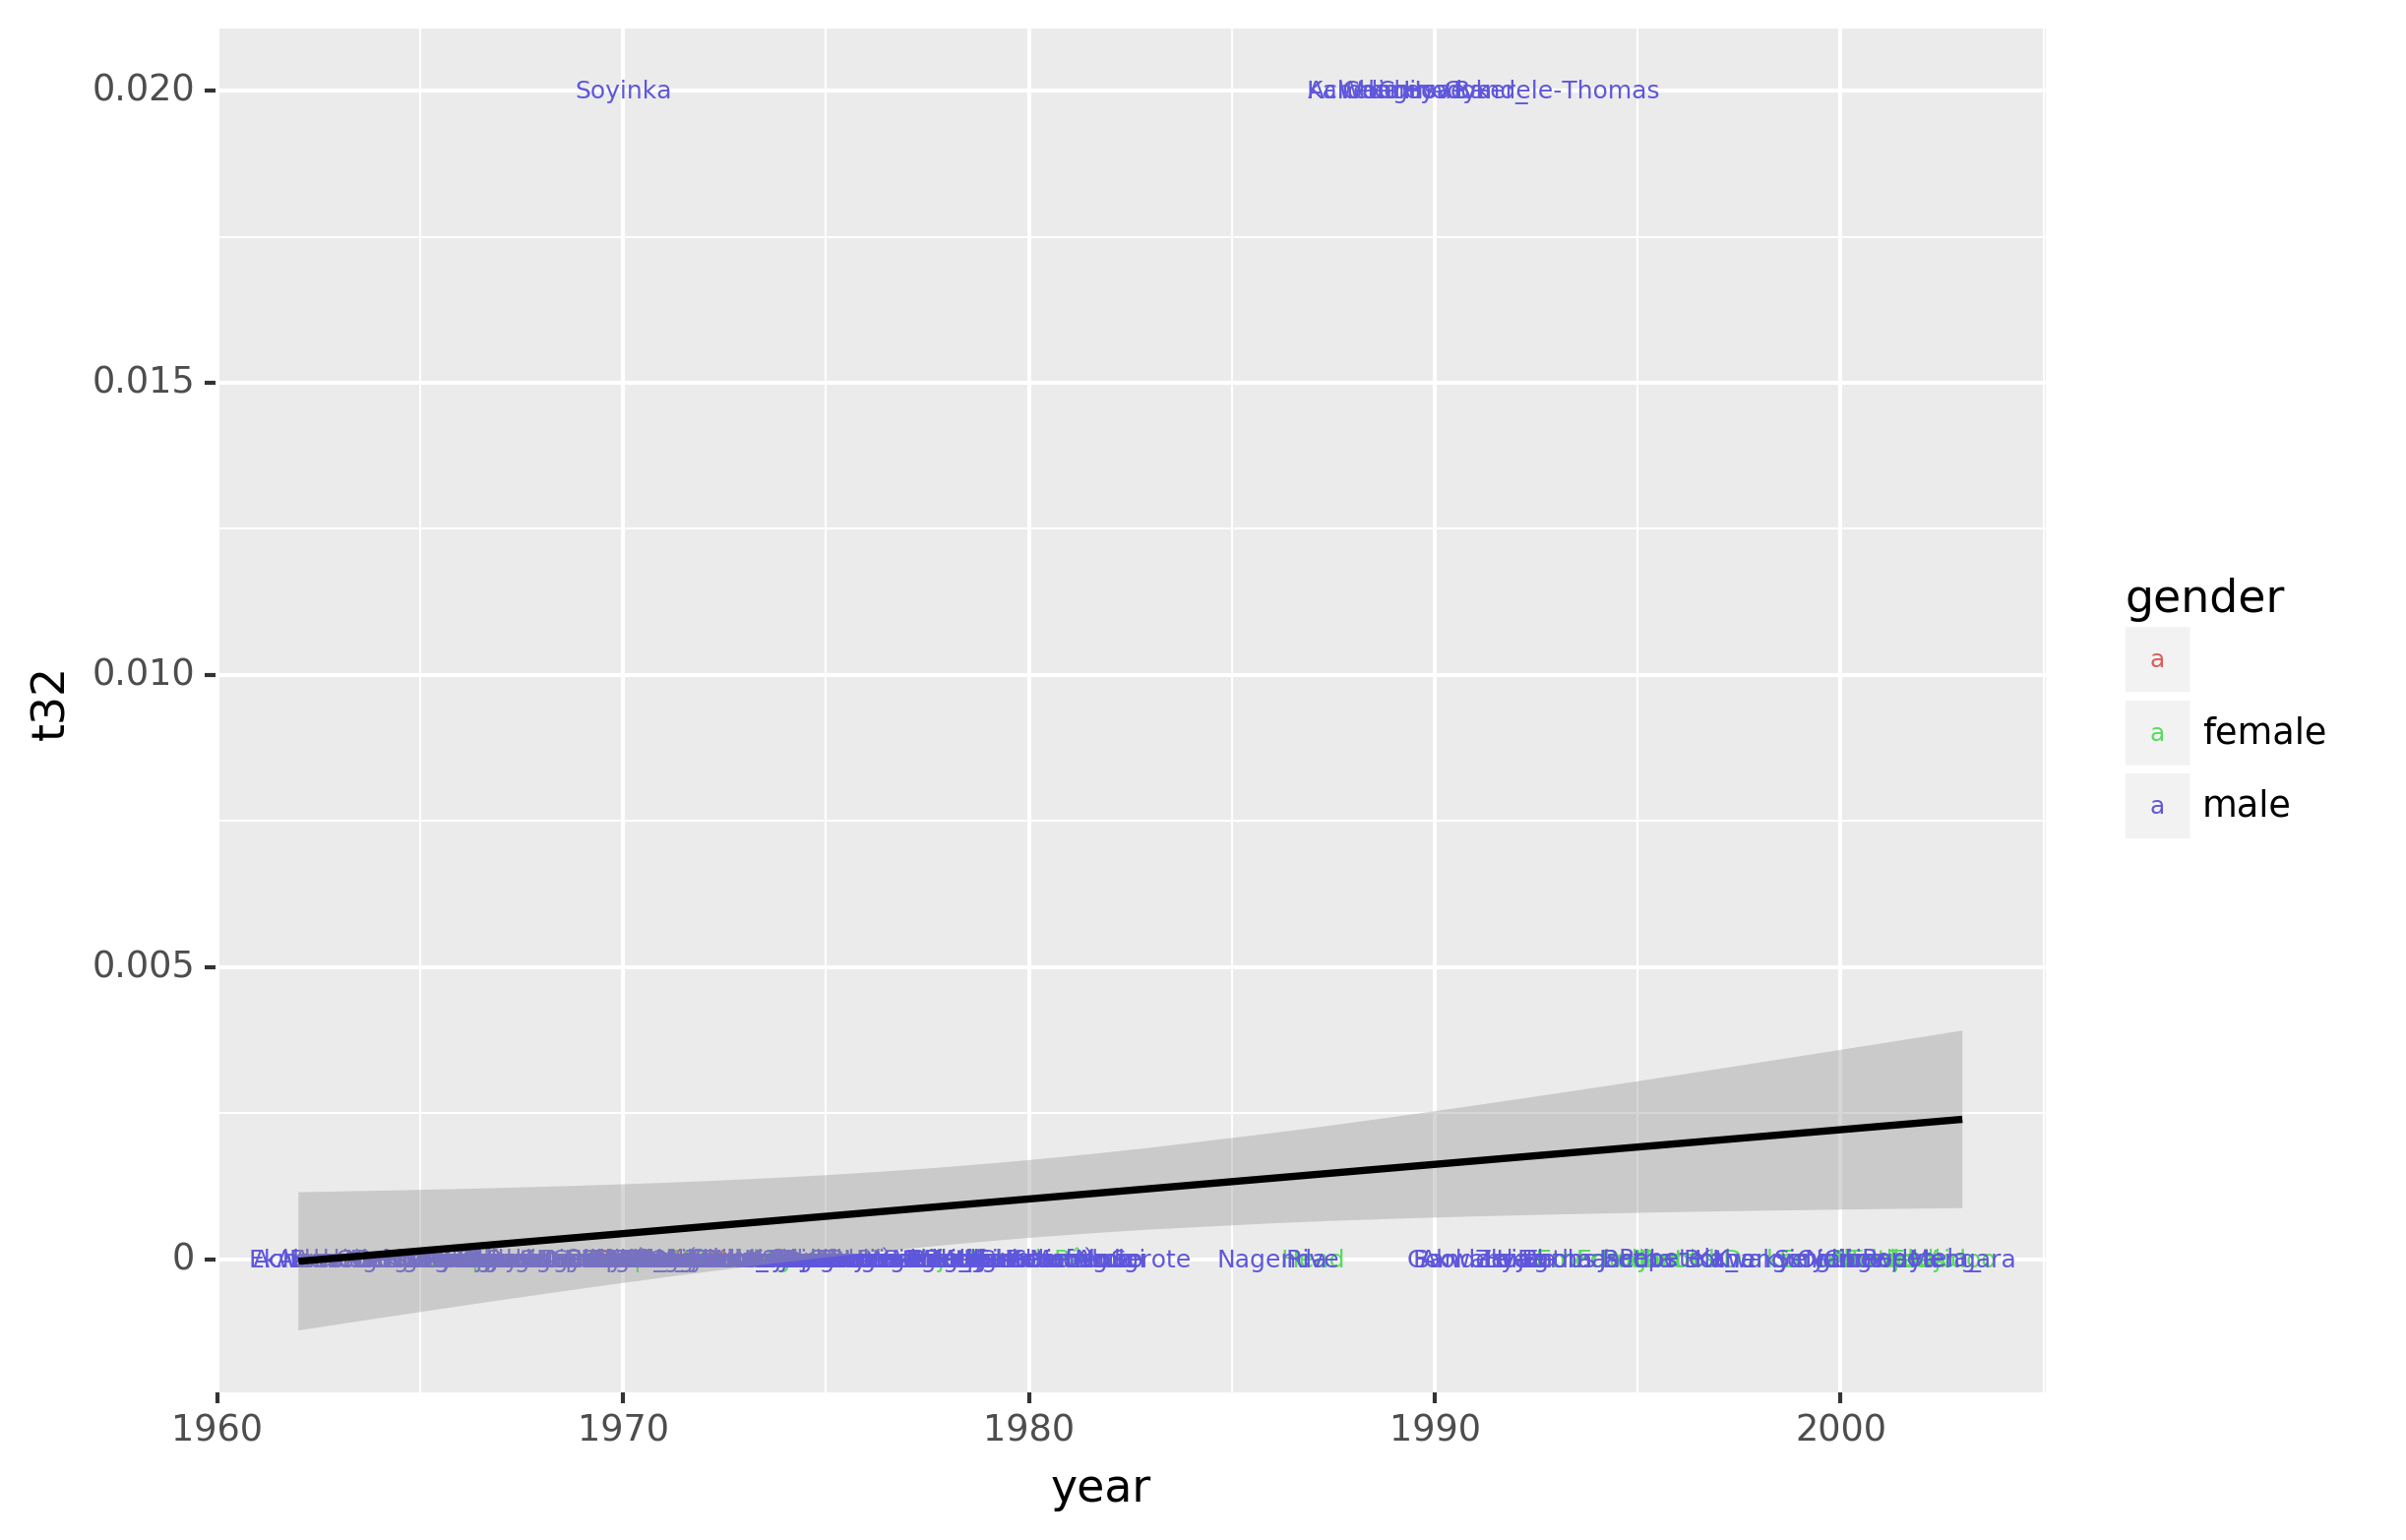

<ggplot: (8785364393029)>

In [105]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't32', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig

## This one looks more diverse

# Now looking at fuzzier topics

In [100]:
#T4 - thievery
show_topic_words(4)

theft thieves cave robbery robbers foreigners shillings feast peasants competition card ceremonies masses university platform profit clan handbag companies talents worker vehicle fruits petrol instruments hotel countries banks bellies unity doubts organization culture hotels judge crown overalls testimony experts thirst cards disciples peasant perfume deeds cents aunt clubs famine chains imperialism horns paths council slavery salary skills imperialists saying homestead praises robes fare worlds suits knot motor capital stores humanity types products degrees suitcase whites delegation souls rags factory flower cent slaves learning carpet pearls thugs site tins director skins pistol fees organ composition hero farms roadside vegetables talent ambition 

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

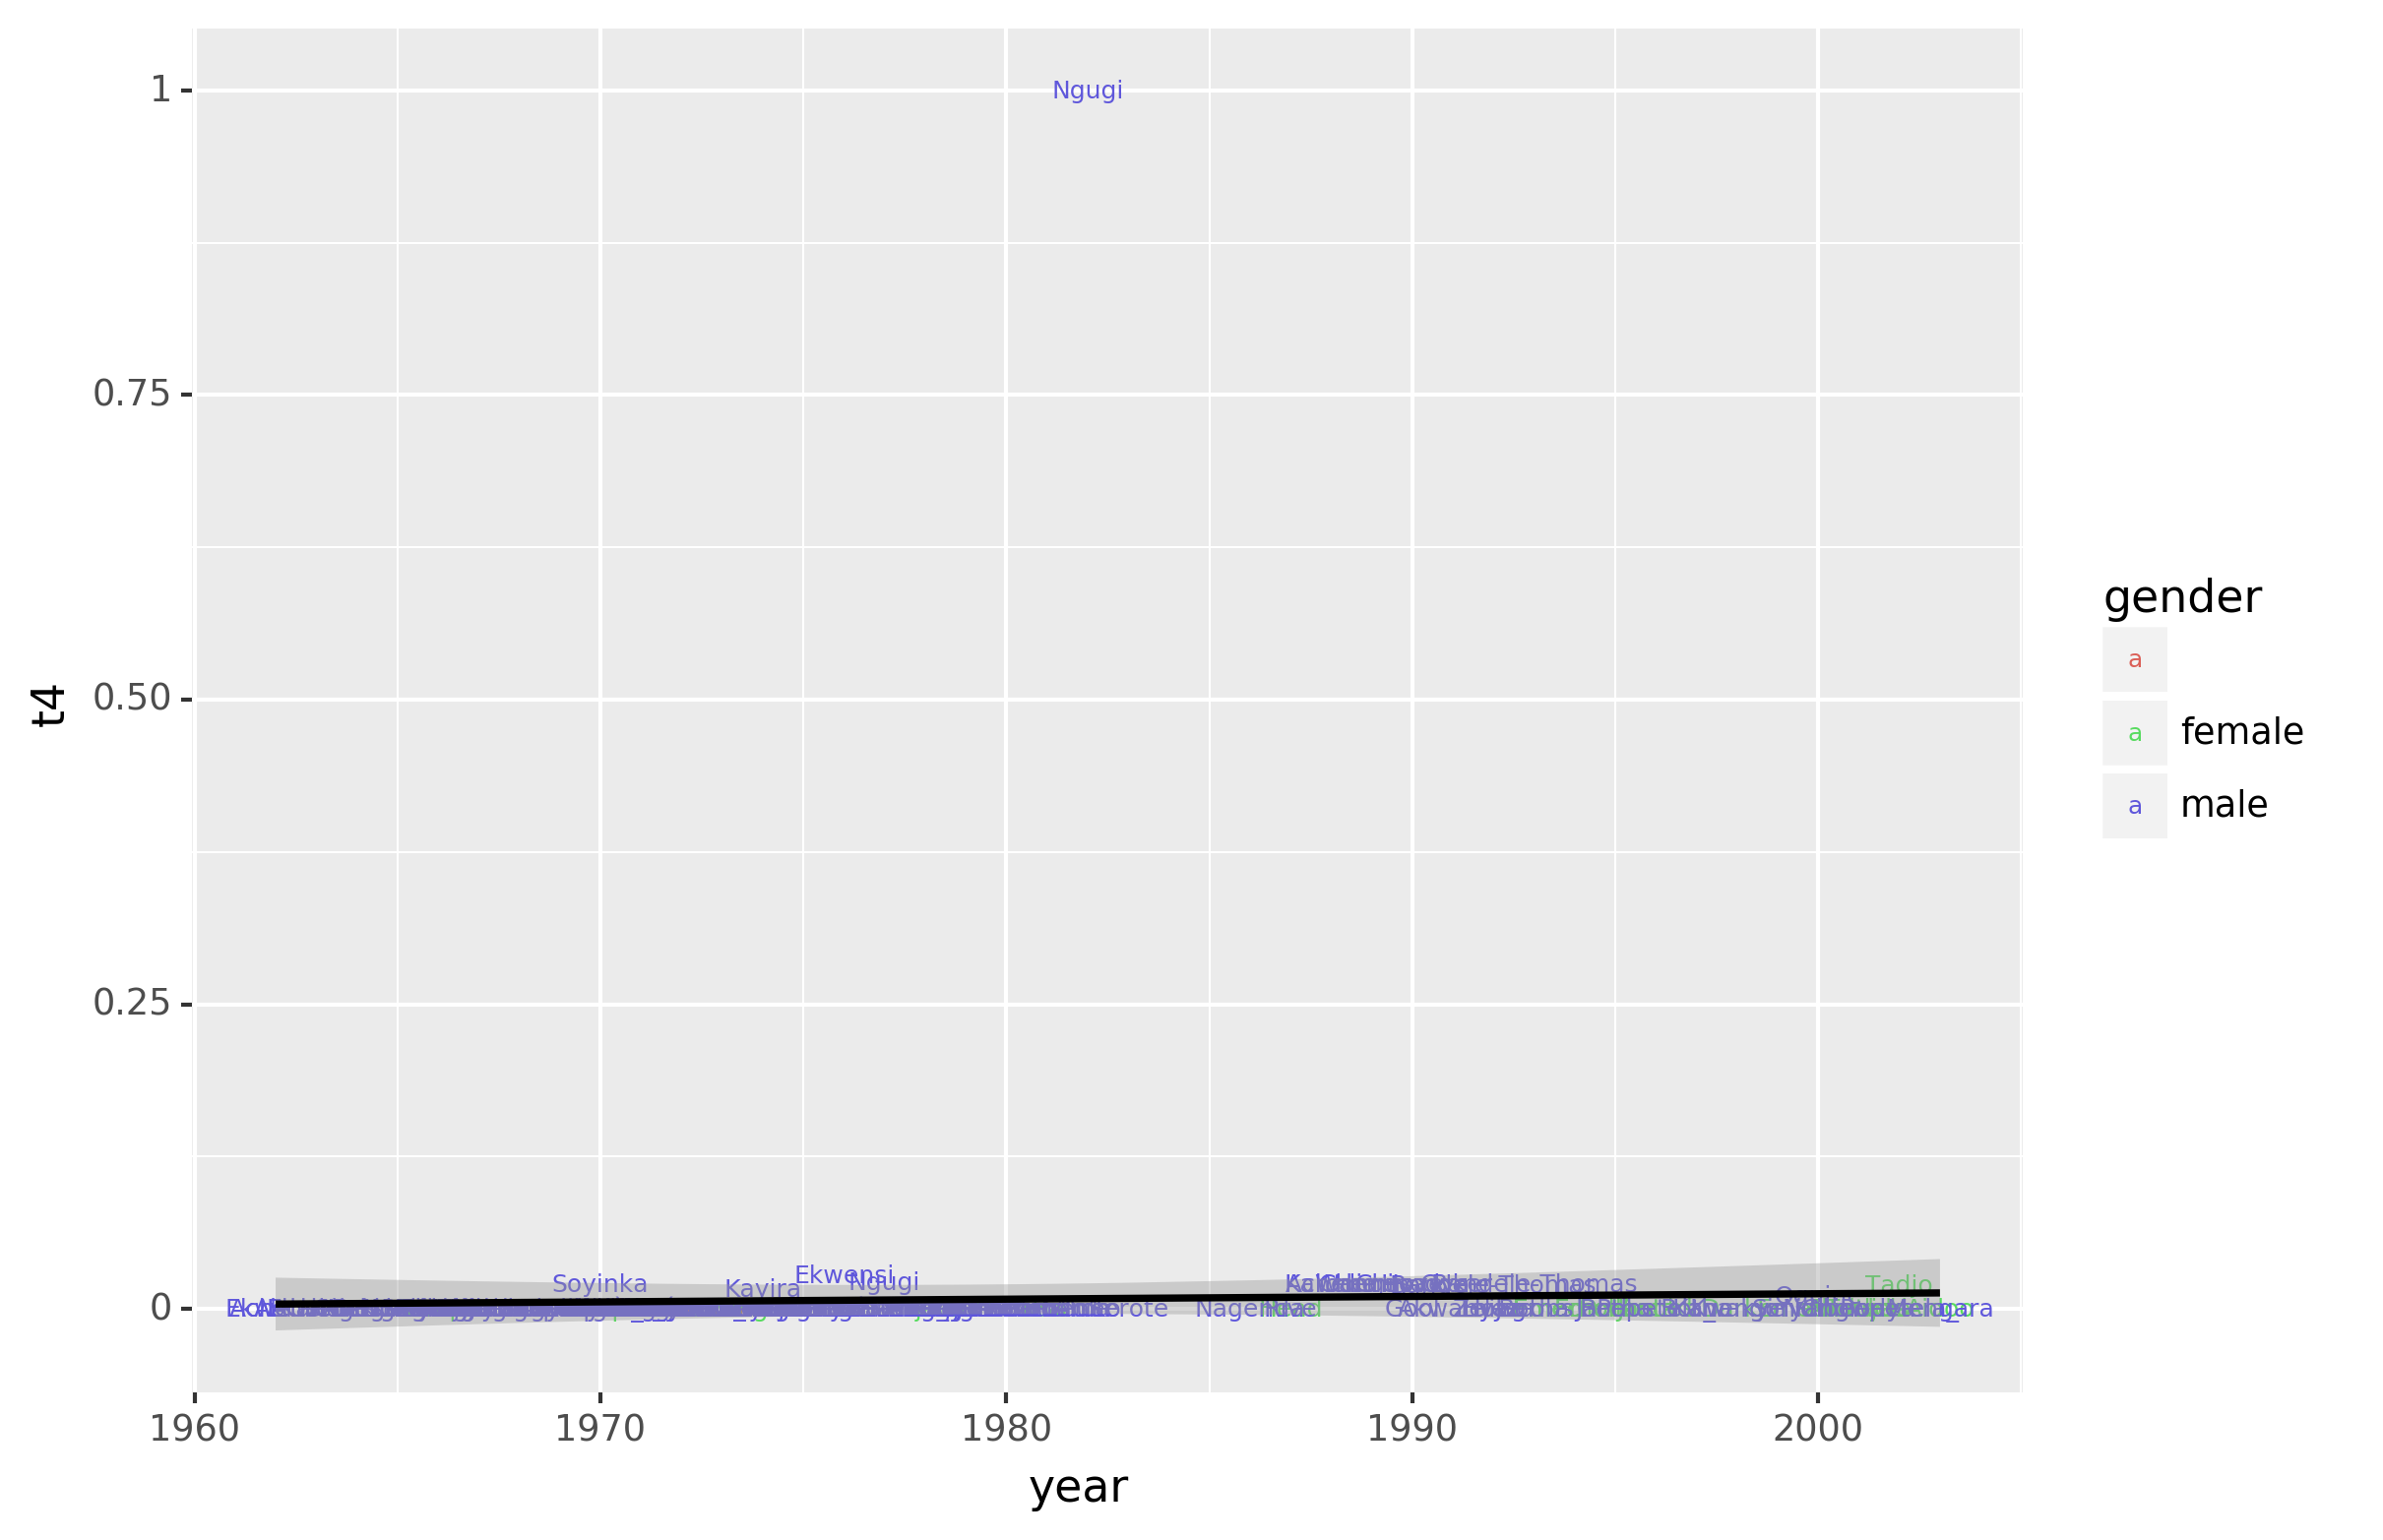

<ggplot: (8785372573157)>

In [101]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't4', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig

In [ ]:
## wow all ngugi!

In [102]:
# T33 - leisure
show_topic_words(33)

mistress frog whisky beggar villa francs cinema fountain tenderness aunt whites chauffeur fishing editor caf jacket hotel maid telephone coast appointment polygamy article scandal pavement sir cheque district businessmen hunters customer tomb deputy shyness boss dresses presents shower colleagues monkeys phone contrary pension virgin thread goodness tones cowries innocence journalist employer pregnancy writer tailor film lane plane engagement kiss receiver fiance minister stairs star fraud sofa divorce calabash inhabitants basement wishes artist articles licence arguments carpenter ladies bathroom intentions liquid leper bye cigar astonishment adventure promotion coward expense contract jealousy silk disgrace pyjamas explanations precautions peasant darling island ambition chap 

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-package

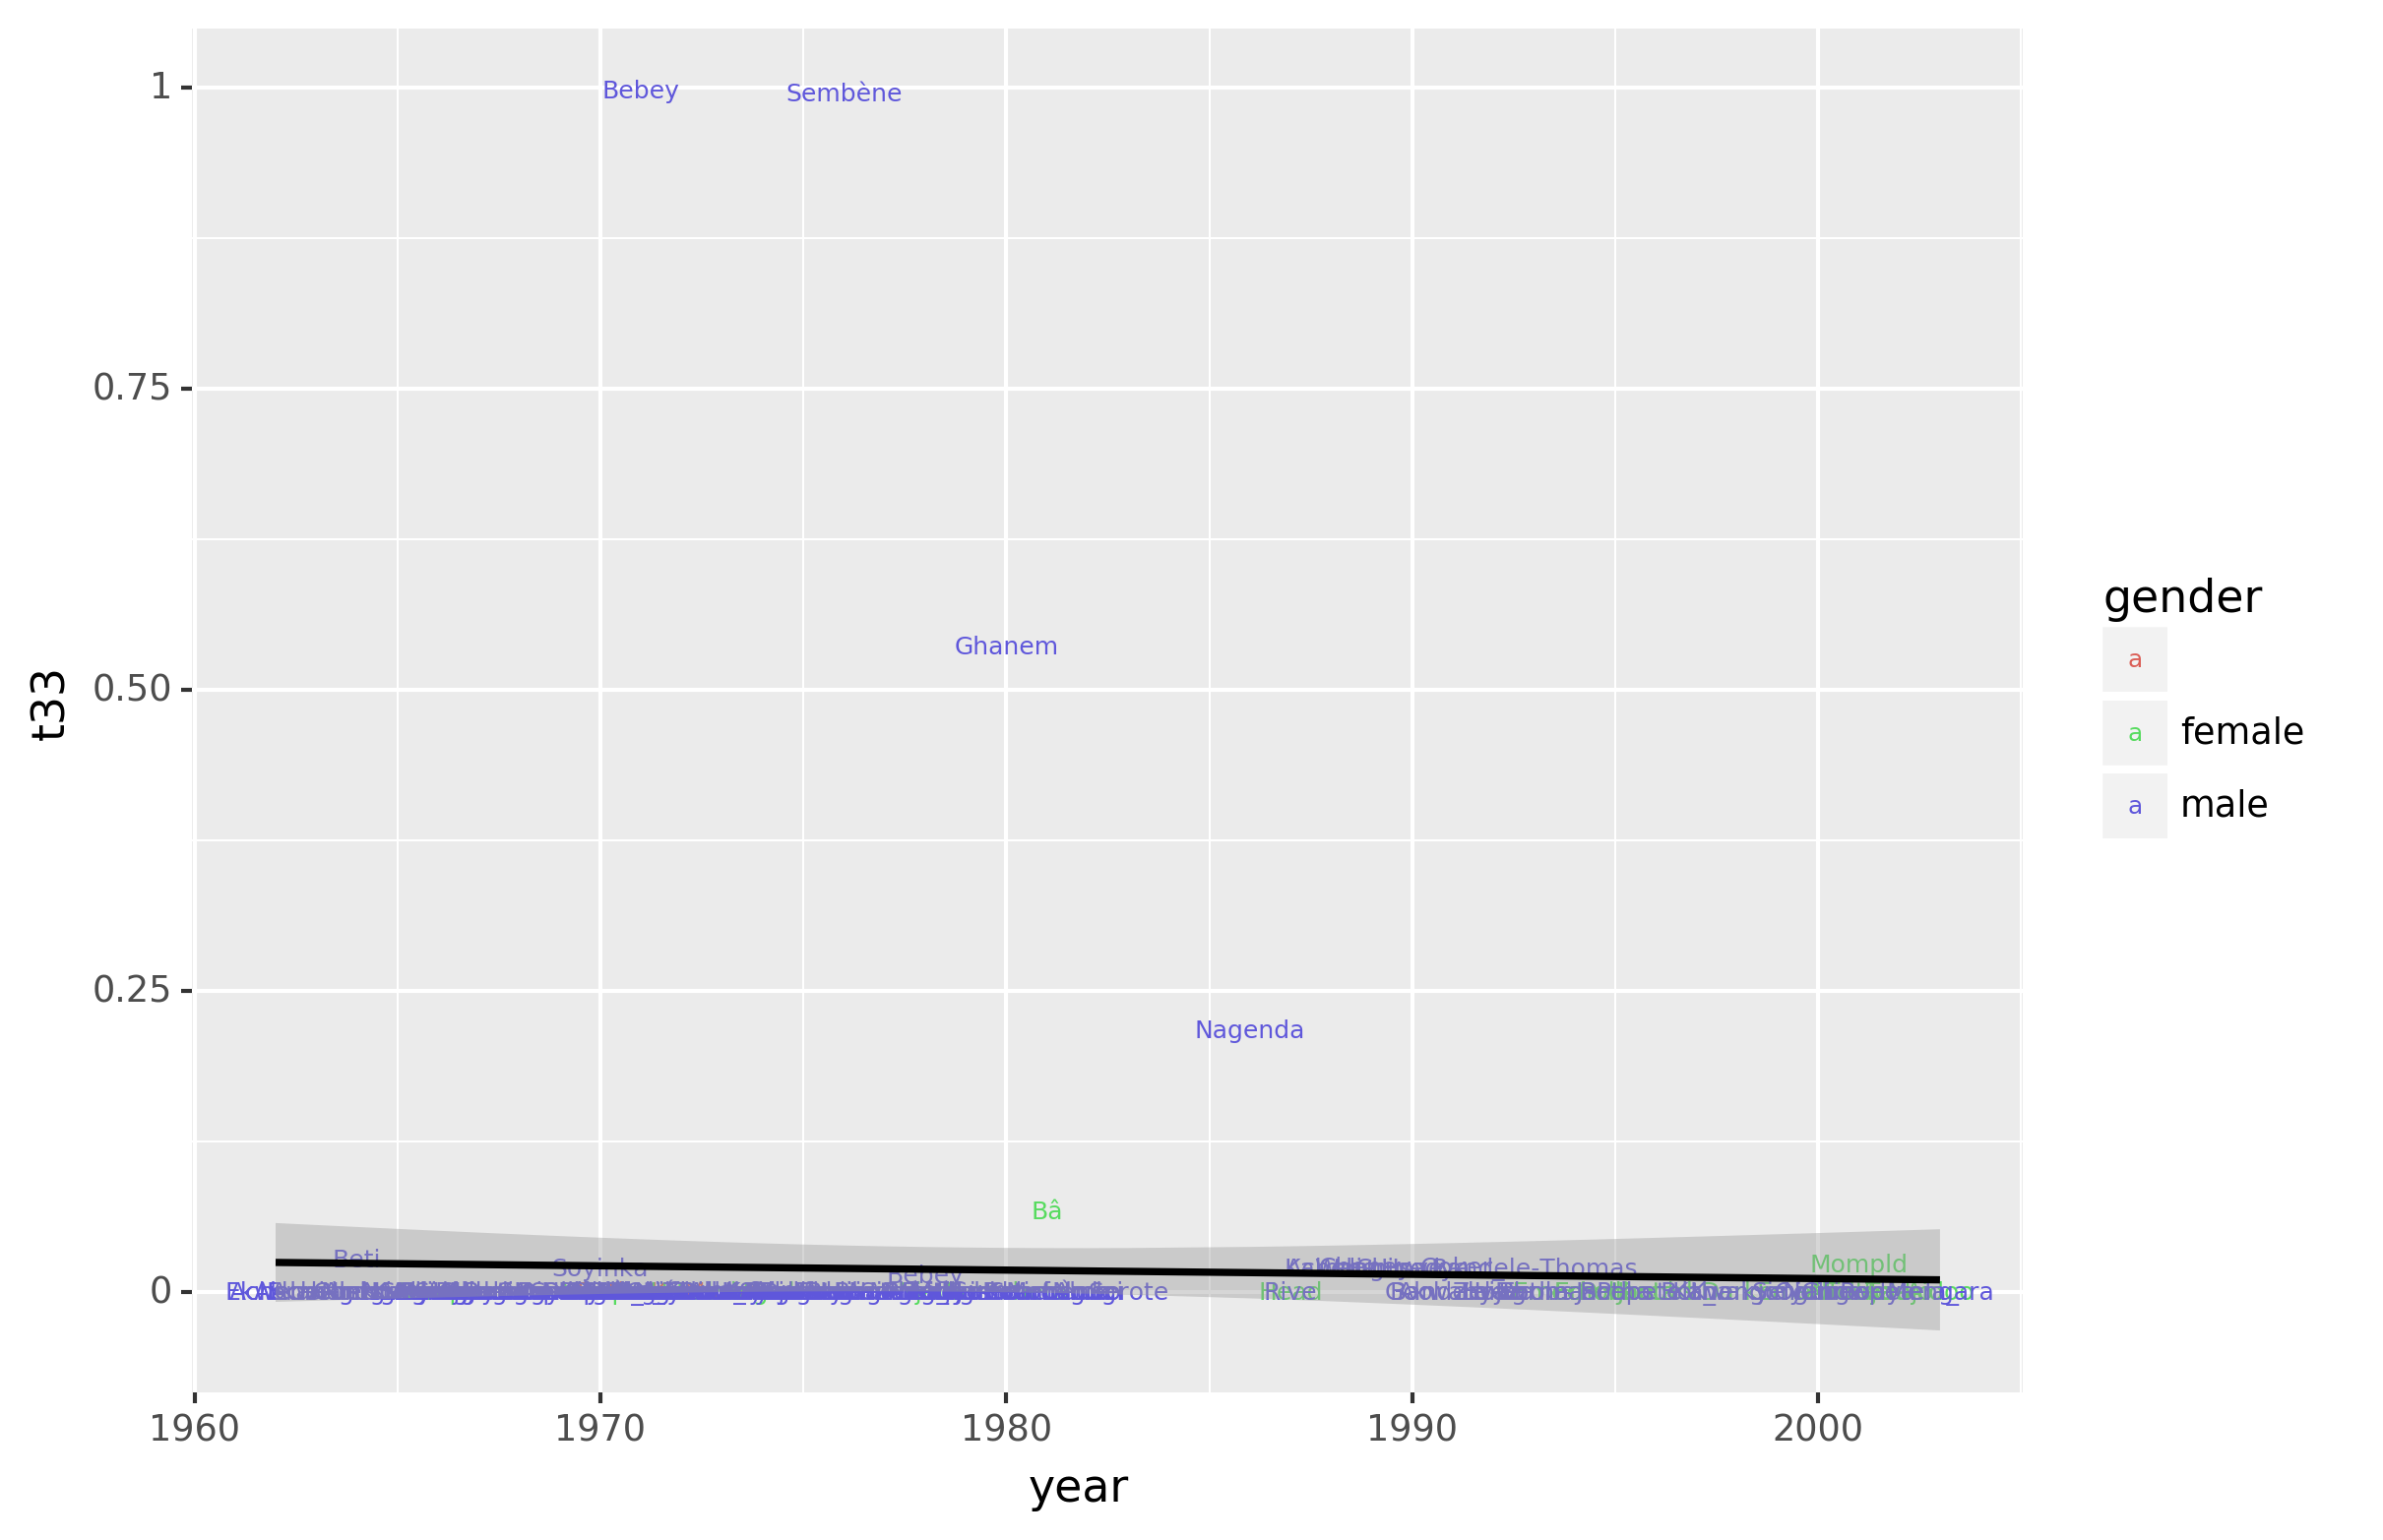

<ggplot: (8785382979729)>

In [103]:
fig = p9.ggplot(
    #first topic aesthetic arguments
    p9.aes(x = 'year', y = 't33', label = 'lastname'), #color ='gender'), 
    #second argument df being used
    data = figdf
)
#fig+=p9.geom_point()
fig+=p9.geom_text(p9.aes(color = 'gender'), size=6)
fig+=p9.geom_smooth(method='lm')
fig